# Trabajo práctico integrador - Análisis de datos
## Carrera de Especialización En Inteligencia Artificial - Cohorte 17
### Autores:
* Horn, Martin
* Lloveras, Alejandro
* Méndez, Diego Martín
* Micozzi, María Luz

El dataset contiene más de 30000 registros de canciones de Spotify de 6 categorias (EDM, Latin, Pop, R&B, Rap y Rock) tomados por medio de la API de Spotify.

El dataset cuenta con información actualizada a fines del 2023.

Nos centraremos en el campo track_popularity y buscaremos su relación con otros campos que describen las características musicales como: key, tempo, danceability, energy, etc.; o el género/subgénero y año de lanzamiento.

### Campos:

| Variable                  | Descripción                                                                                                                                                                                                                                     |
|---------------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| `track_id`                | ID único de la canción                                                                                                                                                                                                                          |
| `track_name`              | Nombre de la canción                                                                                                                                                                                                                             |
| `track_artist`            | Artista de la canción                                                                                                                                                                                                                            |
| `track_popularity`        | Popularidad de la canción (0-100), donde un valor más alto indica una mayor popularidad                                                                                                                                                         |
| `track_album_id`          | ID único del álbum                                                                                                                                                                                                                               |
| `track_album_name`        | Nombre del álbum de la canción                                                                                                                                                                                                                  |
| `track_album_release_date`| Fecha de lanzamiento del álbum                                                                                                                                                                                                                   |
| `playlist_name`           | Nombre de la lista de reproducción                                                                                                                                                                                                              |
| `playlist_id`             | ID de la lista de reproducción                                                                                                                                                                                                                   |
| `playlist_genre`          | Género de la lista de reproducción                                                                                                                                                                                                               |
| `playlist_subgenre`       | Subgénero de la lista de reproducción                                                                                                                                                                                                            |
| `danceability`            | Describe qué tan adecuada es una pista para bailar, basándose en una combinación de elementos musicales. Un valor de 0.0 es menos bailable y 1.0 es más danceable.                                                            |
| `energy`                  | La energía es una medida de 0.0 a 1.0 y representa una medida perceptual de intensidad y actividad. Típicamente, las pistas energéticas se sienten rápidas y ruidosas.                                                                 |
| `key`                     | La tonalidad general estimada de la pista. Los enteros se asignan a notas utilizando la notación estándar de Clase de Tonos. Ej. 0 = C, 1 = C♯/D♭, 2 = D, y así sucesivamente. Si no se detecta tonalidad, el valor es -1.                          |
| `loudness`                | La sonoridad general de una pista en decibelios (dB). Los valores típicos oscilan entre -60 y 0 dB.                                                                                     |
| `mode`                    | El modo indica la modalidad (mayor o menor) de una pista. Mayor está representado por 1 y menor por 0.                                                                                  |
| `speechiness`             | La presencia de palabras habladas en una pista. Los valores por encima de 0.66 describen pistas que probablemente están hechas completamente de palabras habladas.                                                                           |
| `acousticness`            | Una medida de confianza de 0.0 a 1.0 sobre si la pista es acústica. 1.0 representa una alta confianza en que la pista es acústica.                                                     |
| `instrumentalness`        | Predice si una pista no contiene voces. Valores por encima de 0.5 están destinados a representar pistas instrumentales.                                                                  |
| `liveness`                | Detecta la presencia de una audiencia en la grabación. Un valor superior a 0.8 proporciona una alta probabilidad de que la pista sea en vivo.                                          |
| `valence`                 | Una medida de 0.0 a 1.0 que describe la positividad musical transmitida por una pista. Las pistas con alta valencia suenan más positivas (por ejemplo, felices, alegres, eufóricas), mientras que las pistas con baja valencia suenan más negativas (por ejemplo, tristes, deprimidas, enojadas). |
| `tempo`                   | El tempo estimado general de una pista en beats por minuto (BPM).                                                                                                                      |
| `duration_ms`             | Duración de la canción en milisegundos                                                                                                                                                                                                          |


In [91]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score, r2_score, mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn import tree
from sklearn.feature_selection import SelectKBest, f_regression



In [103]:
# leer CSV
df = pd.read_csv('spotify_songs.csv')

## Exploración y Comprensión de los Datos

In [3]:
df.describe()

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000
mean,42.477081,0.654850,0.698619,5.374471,-6.719499,0.565711,0.107068,0.175334,0.084747,0.190176,0.510561,120.881132,225799.811622
std,24.984074,0.145085,0.180910,3.611657,2.988436,0.495671,0.101314,0.219633,0.224230,0.154317,0.233146,26.903624,59834.006182
min,0.000000,0.000000,0.000175,0.000000,-46.448000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4000.000000
25%,24.000000,0.563000,0.581000,2.000000,-8.171000,0.000000,0.041000,0.015100,0.000000,0.092700,0.331000,99.960000,187819.000000
50%,45.000000,0.672000,0.721000,6.000000,-6.166000,1.000000,0.062500,0.080400,0.000016,0.127000,0.512000,121.984000,216000.000000
75%,62.000000,0.761000,0.840000,9.000000,-4.645000,1.000000,0.132000,0.255000,0.004830,0.248000,0.693000,133.918000,253585.000000
max,100.000000,0.983000,1.000000,11.000000,1.275000,1.000000,0.918000,0.994000,0.994000,0.996000,0.991000,239.440000,517810.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

In [5]:
df.head(3)

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616


In [6]:
df.sample(3)

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
8613,5ZY8CsGBDp8AJ31fPx6qds,Go Getta - (Explicit),Jeezy,0,77tcxktbsk2pcqxjA5asXe,Go Getta Hit Pack (Explicit Version),2007,Gangster Rap Workout,0ZRwrJ2EDGyKR6YgQPWXeO,rap,...,3,-6.545,0,0.1780,0.0940,0.000000,0.188,0.439,174.220,228760
25991,1K6Rg7qwAsMAD0AwLJTvvT,Shine on You Crazy Diamond,Kendra Morris,15,0SN5531qDvJh9Ydpz1aZc8,Mockingbird,2014-10-01,NEO FUNK AND SOUL,2WbTrS5D0V2TW6DiDkJBru,r&b,...,7,-8.065,0,0.0315,0.0431,0.000342,0.218,0.211,139.453,281315
30525,3UILi4d1uxhm3Brl0x1sXI,Paradise,Nightro,18,79ZRO9uP523CVgjKmufwpy,Paradise,2019-08-23,EDM Trap,7CEEEMKV41x0RlFCXWdvKF,edm,...,1,-4.050,0,0.3470,0.0832,0.000000,0.138,0.565,148.805,156867


In [7]:
df.tail(3)

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
32830,7ImMqPP3Q1yfUHvsdn7wEo,Sweet Surrender - Radio Edit,Starkillers,14,0ltWNSY9JgxoIZO4VzuCa6,Sweet Surrender (Radio Edit),2014-04-21,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,6,-4.899,0,0.0481,0.108000,0.000001,0.150,0.4360,127.989,210112
32831,2m69mhnfQ1Oq6lGtXuYhgX,Only For You - Maor Levi Remix,Mat Zo,15,1fGrOkHnHJcStl14zNx8Jy,Only For You (Remixes),2014-01-01,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,2,-3.361,1,0.1090,0.007920,0.127000,0.343,0.3080,128.008,367432
32832,29zWqhca3zt5NsckZqDf6c,Typhoon - Original Mix,Julian Calor,27,0X3mUOm6MhxR7PzxG95rAo,Typhoon/Storm,2014-03-03,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,5,-4.571,0,0.0385,0.000133,0.341000,0.742,0.0894,127.984,337500


### Comprensión de features musicales del dataset

Exploramos los valores máximos y minimos de features específicos, aprovechando la posibilidad de buscar las canciones en Spotify para escucharlas.

In [8]:
# Speechiness
max_speechiness = df['speechiness'].max()

# Obtenemos las canciones con el valor maximo de 'speechiness'
tracks_with_max_speechiness = df[df['speechiness'] == max_speechiness]

tracks_with_max_speechiness

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
25705,5ZbJR1AfdOsvsYNuCvgqKX,I'M DEAD,Duckwrth,59,1JqHKxNhfBv3ZIz1VwhENp,I'M UUGLY,2016-09-23,Groovy // Funky // Neo-Soul,0JmBB9HfrzDiZoPVRdv8ns,r&b,...,4,-9.414,0,0.918,0.707,0.0,0.356,0.485,114.907,230632


Se aprecia que la variable 'speechiness' describe canciones con gran presencia de la voz (generalmente rapeadas).

In [9]:
# Acousticness
min_acousticness = df['acousticness'].min()

# Obtenemos las canciones con el valor maximo de 'acousticness'
tracks_with_min_acousticness = df[df['acousticness'] == min_acousticness]

tracks_with_min_acousticness

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
11363,51w6nRCU68klqNfYaaVP2j,"Hi, How're You Doin'?",DREAMS COME TRUE,0,4wdK52JVu5GzhxW3RCZ3AV,Dreams Come True,1989-03-21,City Pop 1985 シティーポップ,3j2osvmecEao5nmo9jZ5df,rock,...,1,-26.087,1,0.0,0.0,0.0,0.0,0.0,0.0,4000


In [10]:
# Instrumentalness
min_instrumentalness = df['instrumentalness'].min()

# Obtenemos las canciones con el valor maximo de 'instrumentalness'
tracks_with_min_instrumentalness = df[df['instrumentalness'] == min_instrumentalness]

tracks_with_min_instrumentalness

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.10200,0.0,0.0653,0.518,122.036,194754
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.08030,0.0,0.0833,0.725,123.976,189052
5,7fvUMiyapMsRRxr07cU8Ef,Beautiful People (feat. Khalid) - Jack Wins Remix,Ed Sheeran,67,2yiy9cd2QktrNvWC2EUi0k,Beautiful People (feat. Khalid) [Jack Wins Remix],2019-07-11,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,8,-5.385,1,0.1270,0.07990,0.0,0.1430,0.585,124.982,163049
6,2OAylPUDDfwRGfe0lYqlCQ,Never Really Over - R3HAB Remix,Katy Perry,62,7INHYSeusaFlyrHSNxm8qH,Never Really Over (R3HAB Remix),2019-07-26,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,5,-4.788,0,0.0623,0.18700,0.0,0.1760,0.152,112.648,187675
9,1IXGILkPm0tOCNeq00kCPa,If I Can't Have You - Gryffin Remix,Shawn Mendes,67,4QxzbfSsVryEQwvPFEV5Iu,If I Can't Have You (Gryffin Remix),2019-06-20,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,2,-4.552,1,0.0320,0.05670,0.0,0.0919,0.590,124.957,253040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32802,3Gwq0zKnMWluOEPKh93BeC,Lost At Sea,Zedd,51,7juWTdmjo0vYywWu8HiQxs,Clarity,2012-01-01,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,6,-3.534,1,0.0364,0.02470,0.0,0.1240,0.305,127.983,225840
32811,353JGhRW6ahVU3DpCxOjqW,Utopia - Radio Edit,Qubicon,11,466ziBbv68mP56uJom8uSL,Utopia,2014-03-03,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,7,-3.152,1,0.0406,0.01820,0.0,0.1060,0.185,127.998,219844
32813,5sYzg83Vy4IW4TfE9jwk8g,Invincible - Radio Edit,Borgeous,0,3NArAQULJ5BMoR8YY5UdWA,Invincible,2014-02-03,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,6,-4.040,0,0.0409,0.00678,0.0,0.0677,0.391,127.906,204609
32827,0aBDrRTgDCwWbcOnEIp7DJ,Many Ways - Radio Edit,Ferry Corsten feat. Jenny Wahlstrom,27,59XOfNjuYZB6feC6QUzS3e,Many Ways,2013,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,5,-8.367,1,0.0365,0.02660,0.0,0.5720,0.288,128.001,196993


In [11]:
# Liveness
max_liveness = df['liveness'].max()

# Obtenemos las canciones con el valor maximo de 'liveness'
tracks_with_max_liveness = df[df['liveness'] == max_liveness]

tracks_with_max_liveness

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
11296,2da7wnI5OoV89TsdKMM81k,Knockin' On Heaven's Door - Live In London / 1992,Guns N' Roses,50,3ZwjaVcnVo2TwhK8N8WWVs,Live Era '87-'93,1999-01-01,This Is Guns N' Roses,37i9dQZF1DX74DnfGTwugU,rock,...,6,-6.011,1,0.0824,0.00188,0.0157,0.996,0.365,147.509,447160


In [12]:
# Valence
max_valence = df['valence'].min()

# Obtenemos las canciones con el valor maximo de 'valence'
tracks_with_max_valence = df[df['valence'] == max_valence]

tracks_with_max_valence

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
11363,51w6nRCU68klqNfYaaVP2j,"Hi, How're You Doin'?",DREAMS COME TRUE,0,4wdK52JVu5GzhxW3RCZ3AV,Dreams Come True,1989-03-21,City Pop 1985 シティーポップ,3j2osvmecEao5nmo9jZ5df,rock,...,1,-26.087,1,0.0,0.0,0.0,0.0,0.0,0.0,4000


## Técnicas de Visualización

In [13]:
#sns.pairplot(df)
#plt.show()

Puede apreciarse que algunos features poseen gran cantidad de outliers. También es notable un sesgo en la distribución de ciertos features.

Nos interesa ver específicamente la relación entre 'track_popularity' y distintas features musicales.

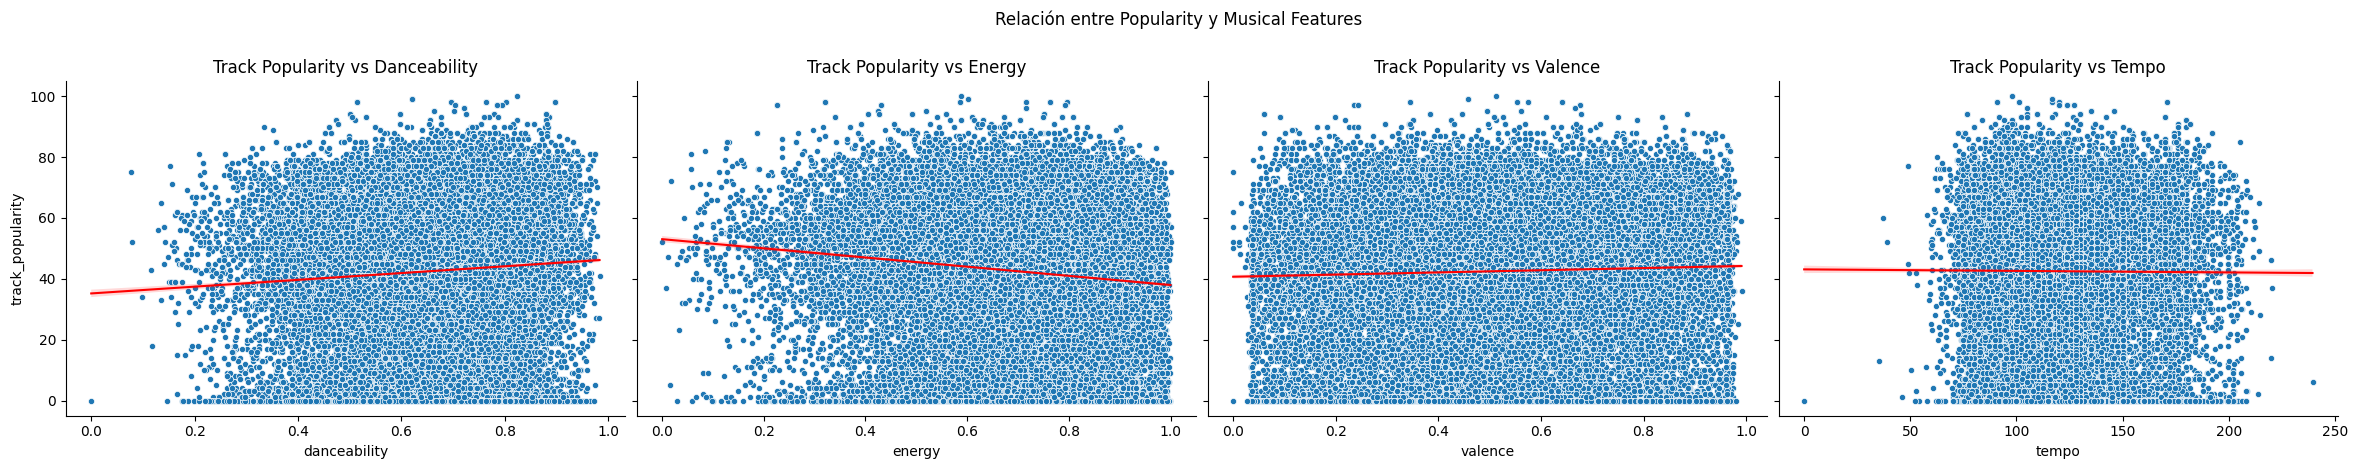

In [14]:
pp = sns.pairplot(df,
                 x_vars=['danceability', 'energy', 'valence', 'tempo'],
                 y_vars='track_popularity',
                 height=4,
                 aspect=1.5,  # Aspect ratio para agrandar los gráficos
                 kind='scatter',  # Scatter plot
                 plot_kws={'s': 20, 'edgecolor': 'w', 'linewidth': 0.5}
)

# Agregamos líneas de regresión
for ax in pp.axes.flat:
    sns.regplot(
        x=ax.collections[0].get_offsets()[:, 0],
        y=ax.collections[0].get_offsets()[:, 1],
        ax=ax,
        scatter=False,
        color='red',
        line_kws={'linewidth': 1.5}
    )

# Leyenda
for ax, feature in zip(pp.axes.flat, ['Danceability', 'Energy', 'Valence', 'Tempo']):
    ax.set_title(f'Track Popularity vs {feature}')
plt.suptitle('Relación entre Popularity y Musical Features', y=1.15)

plt.show()

Puede apreciarse que en todos los casos la correlación es muy baja. Puede concluirse que ni el Tempo ni la Valencia (positividad musical transmitida) tienen influencia sobre la popularidad.

Para 'Danceability' (musica bailable) y 'Energy' se aprecia una mínima correlación, pero no llega a ser determinante.

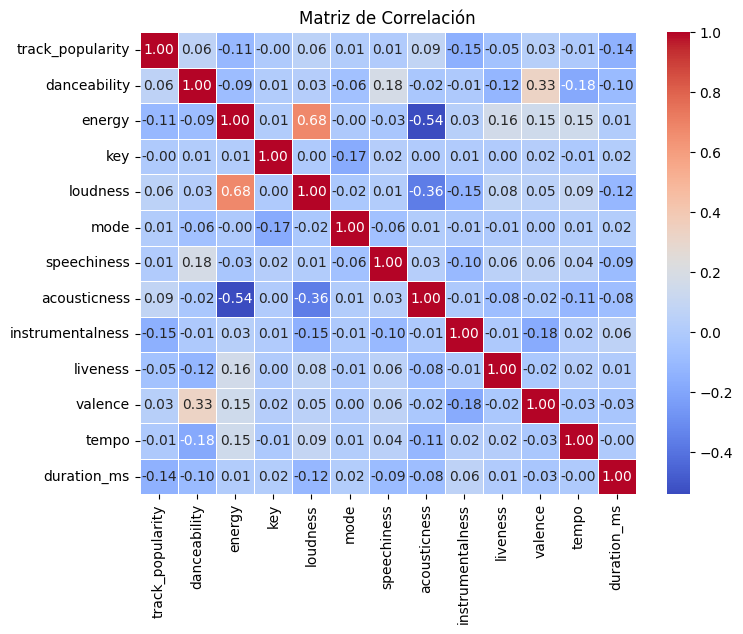

In [15]:
# Seleccionar solo columnas numéricas
numeric_df = df.select_dtypes(include='number')

# Calcular la matriz de correlación
correlation_matrix = numeric_df.corr()

# Crear un gráfico de calor (heatmap) de la matriz de correlación
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

Corroboramos la baja correlación entre la  mayoría de los features.

En los casos que se aprecia una correlación mayor (loudness/energy, acousticness/energy, loudness/acousticness), se trata de variables sintéticas, construidas en función de 'loudness' (parámetro acústico) y otras características del audio.

En el caso de 'valence/danceability' expresa una relación entre la música bailable y la "positividad" transmitida por la pista.

Podemos ver que 'track_popularity' presenta una baja correlación con todas las variables.
Sólo se aprecia una relación levemente mayor para: instrumentalness, duration_ms y energy.

Hipótesis:
- Relación 'instrumentalness/track_popularity': la música cantada (no instrumental) suele ser levemente más popular.
- Relación 'duration_ms/track_popularity': tienden a preferirse las canciones de una duración corta.
- Relación 'energy/track_popularity': a igualdad de condiciones, la pista con mayor volumen es preferida por los oyentes.

Cabe destacar que todas estas correlaciones son mínimas (menores a +/- 0.15).



En el pairplot se observó que algunos valores se encontraban con una distribución sesgada, por lo cual decidimos analizarlos en detalle.

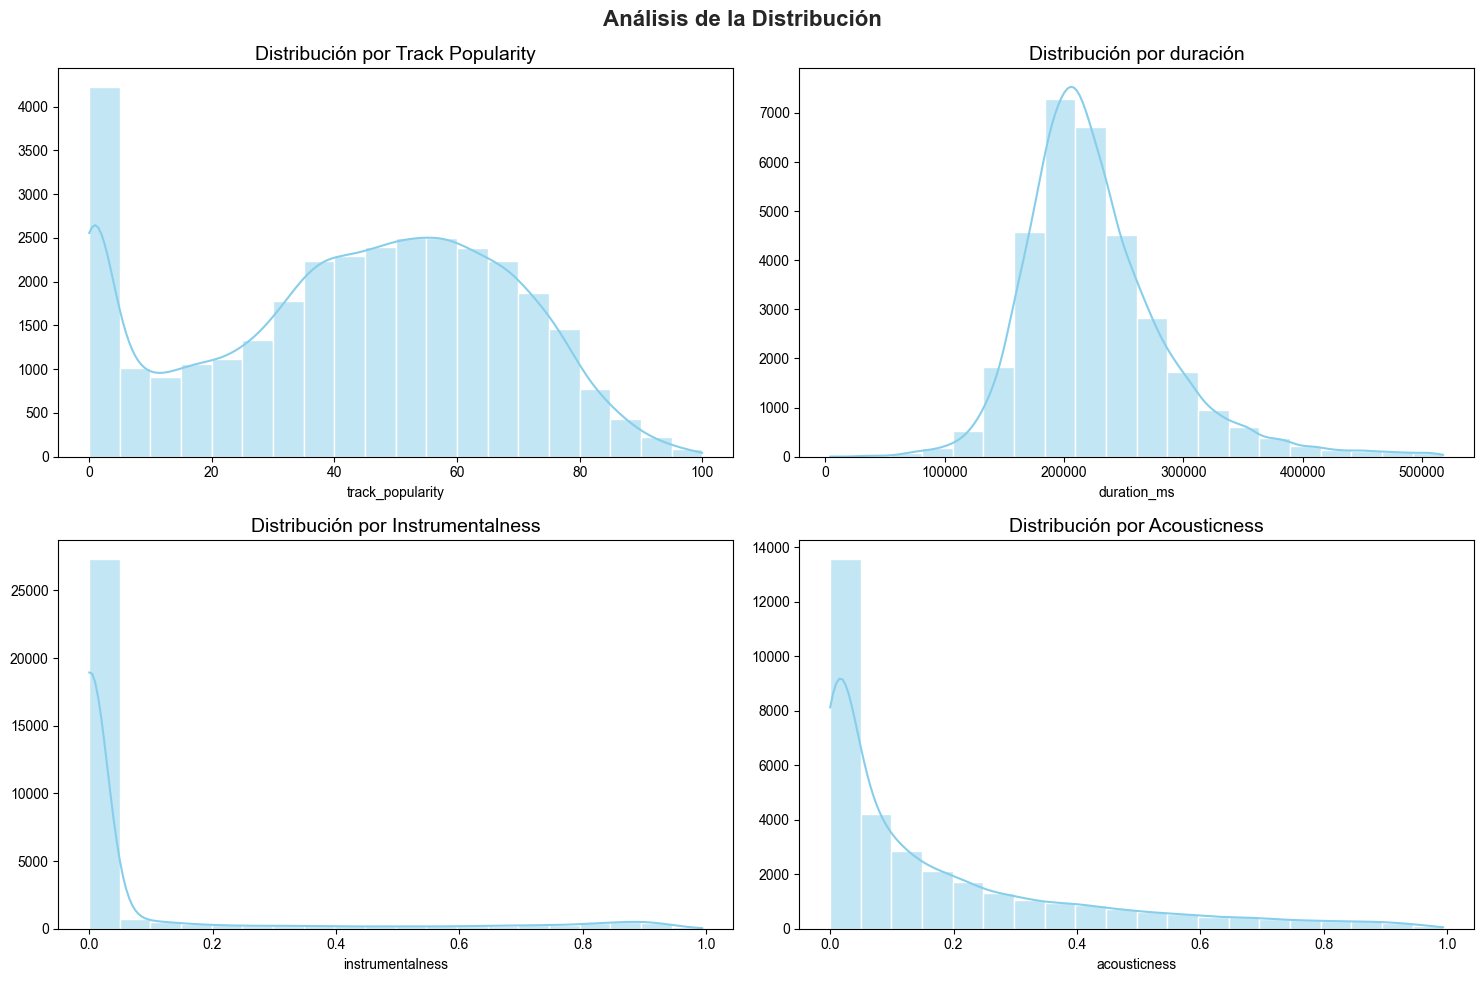

In [16]:
# Análisis de la distribución

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
sns.set(style="whitegrid")
plt.title('Variables con igual rango (0 a 1)', fontsize=14)

# Graficamos la distribución del campo track_popularity
sns.histplot(data=df, x='track_popularity', bins=20, kde=True, color="skyblue", ax=axes[0, 0])
axes[0, 0].set_title('Distribución por Track Popularity', fontsize=14)
axes[0, 0].set_ylabel('')

# Graficamos la distribución del campo acousticness
sns.histplot(data=df, x='duration_ms', bins=20, kde=True, color="skyblue", ax=axes[0, 1])
axes[0, 1].set_title('Distribución por duración', fontsize=14)
axes[0, 1].set_ylabel('')

# Graficamos la distribución del campo acousticness
sns.histplot(data=df, x='instrumentalness', bins=20, kde=True, color="skyblue", ax=axes[1, 0])
axes[1, 0].set_title('Distribución por Instrumentalness', fontsize=14)
axes[1, 0].set_ylabel('')

# Graficamos la distribución del campo acousticness
sns.histplot(data=df, x='acousticness', bins=20, kde=True, color="skyblue", ax=axes[1, 1])
axes[1, 1].set_title('Distribución por Acousticness', fontsize=14)
axes[1, 1].set_ylabel('')

plt.suptitle('Análisis de la Distribución', fontsize=16, fontweight='bold')
plt.tight_layout()  # Ajustar layout para evitar solapamientos
plt.show()

Existe un gran número de pistas con 'track_popularity' cercano a 0. Posiblemente porque no han sido rankeadas por falta de escuchas.

La mayoría de las canciones tienen una duración de 3 min 20 seg. Casi no hay pistas por debajo de 1 min 30 seg. En el extremo superior se aprecia una distribución de cola larga.

Tanto 'instrumentalness' como 'acousticness' están muy sesgados hacia la izquierda.

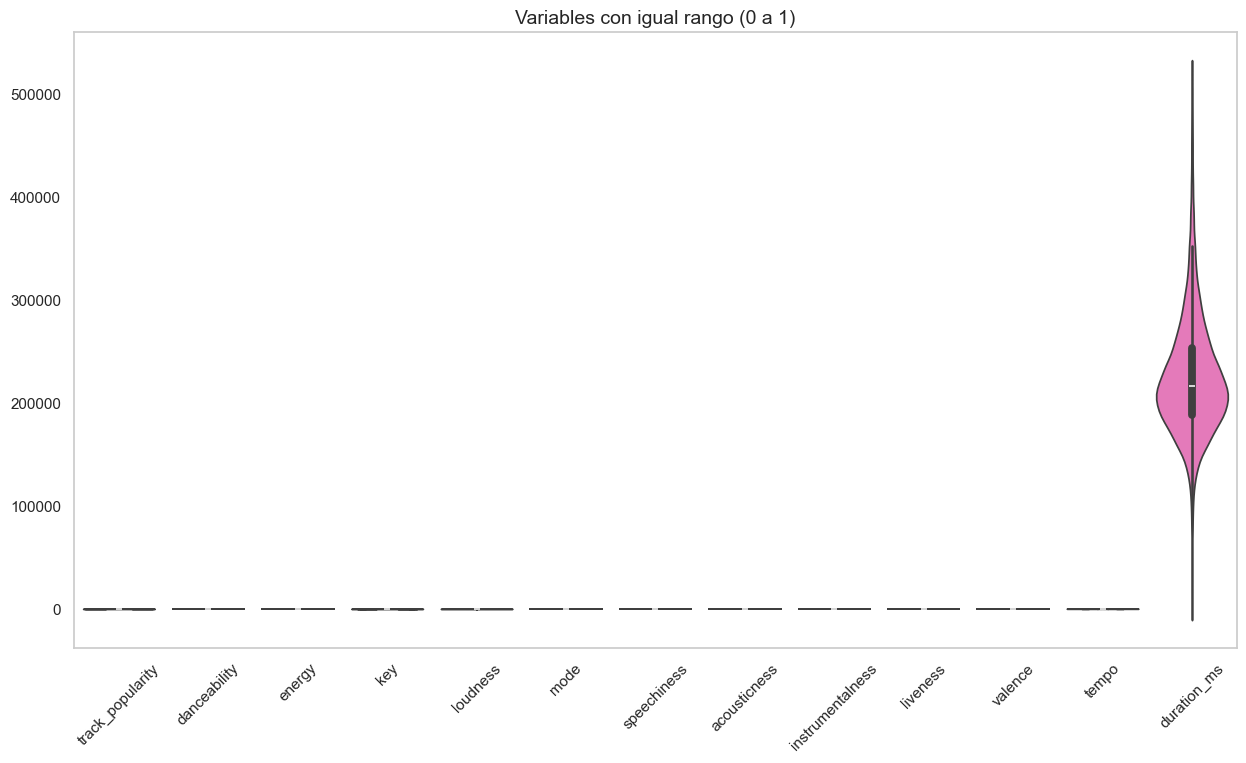

In [17]:
# Violin plot del dataset
plt.figure(figsize=(15, 8))
plt.title('Variables con igual rango (0 a 1)', fontsize=14)
sns.violinplot(data=df)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

Decidimos separar las variables 'duration_ms', 'tempo' y 'track_popularity' en violin plot diferentes por tener un rango diferente que impide la visualización.

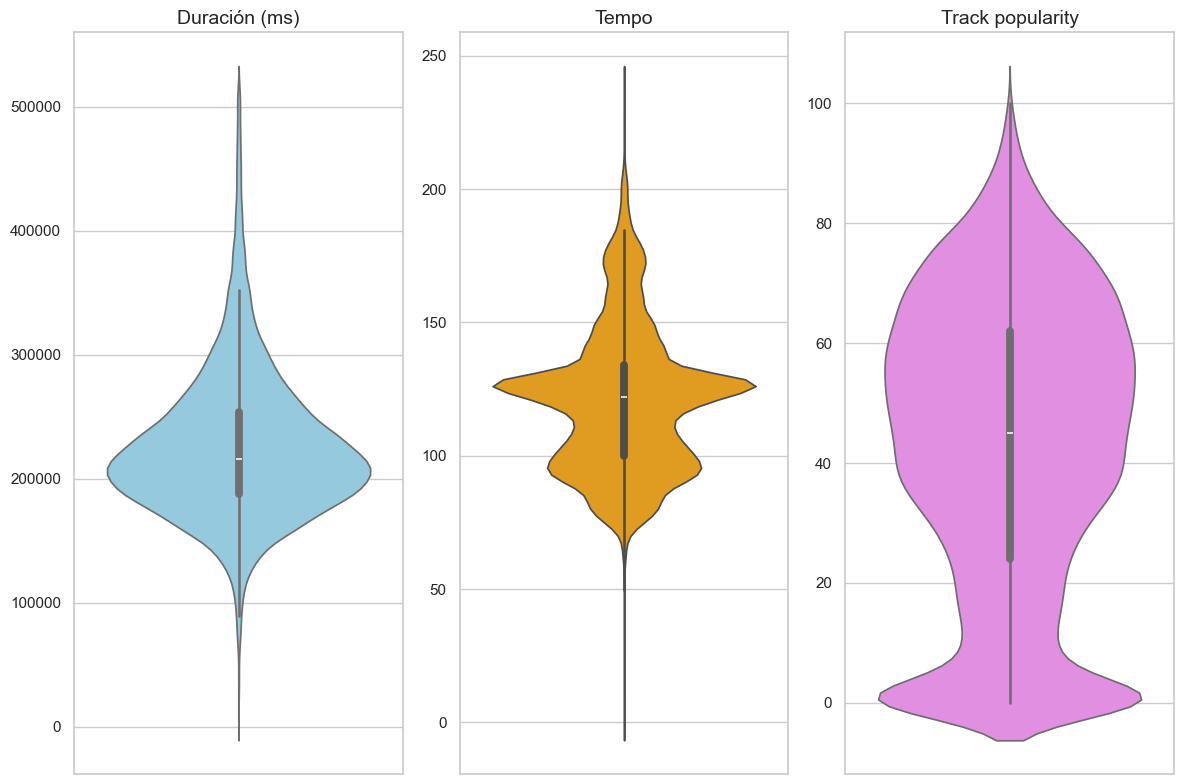

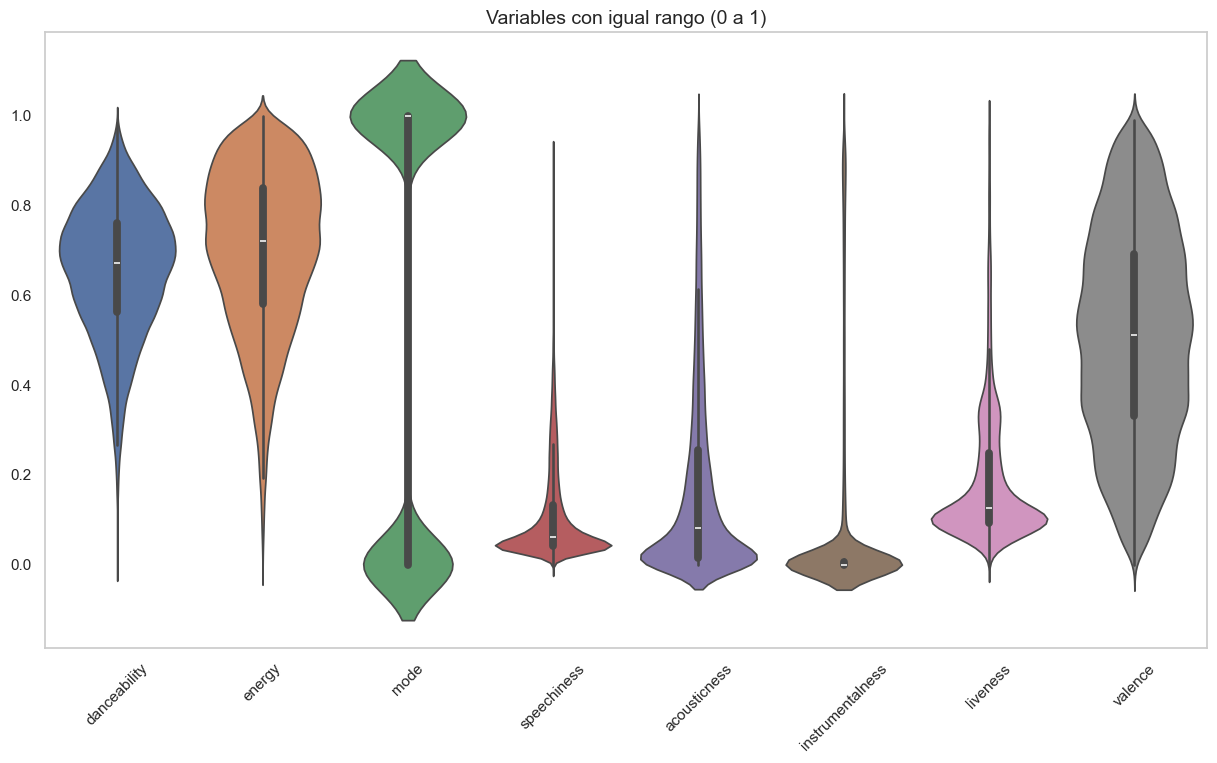

In [18]:
fig, axes = plt.subplots(1, 3, figsize=(12, 8))

# Primer subplot (fila 0, columna 0)
sns.violinplot(ax=axes[0], data=df['duration_ms'], color='skyblue')
axes[0].set_title('Duración (ms)', fontsize=14)
axes[0].set_ylabel('')

# Segundo subplot (fila 0, columna 1)
sns.violinplot(ax=axes[1], data=df['tempo'], color='orange')
axes[1].set_title('Tempo', fontsize=14)
axes[1].set_ylabel('')

# Tercer subplot (fila 1, columna 0)
sns.violinplot(ax=axes[2], data=df['track_popularity'], color='violet')
axes[2].set_title('Track popularity', fontsize=14)
axes[2].set_ylabel('')
# Ajustar el layout para que los subplots no se solapen
plt.tight_layout()

# Mostrar los gráficos
plt.show()

# Violin plot para variables con igual rango (0 a 1)
plt.figure(figsize=(15, 8))
plt.title('Variables con igual rango (0 a 1)', fontsize=14)
sns.violinplot( data=df.drop(['duration_ms','tempo','track_popularity','loudness','key'],axis=1))
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

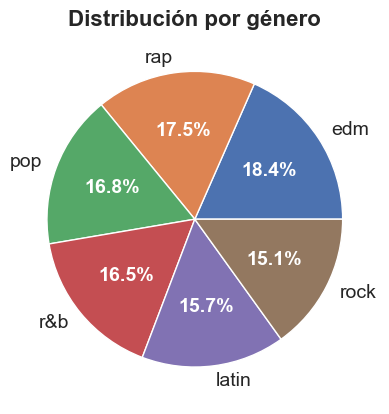

In [19]:
# Estudiamos la distrubición por género
sample = df.groupby('playlist_genre').agg({'track_id': 'count'}).rename(columns={'track_id': 'track_count'}).sort_values(by='track_count', ascending=False)
track_counts = sample['track_count']

wedges, texts, autotexts = plt.pie(
    track_counts,
    labels=sample.index,
    autopct='%1.1f%%',
    textprops={'fontsize': 14}  # Aumenta el tamaño del texto
)

# Aplicar estilos a los porcentajes (autotexts)
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')

plt.title('Distribución por género', fontsize=16, fontweight='bold')
plt.show()

El dataset se encuentra distribuido uniformemente para cada género.

In [20]:
def año_lanzamiento(date):
    if len(date) == 4:
        año = date
        return año
    else:
        año = pd.to_datetime(date, errors='coerce').year
        return año

In [21]:
df['year'] = df['track_album_release_date'].apply(año_lanzamiento)

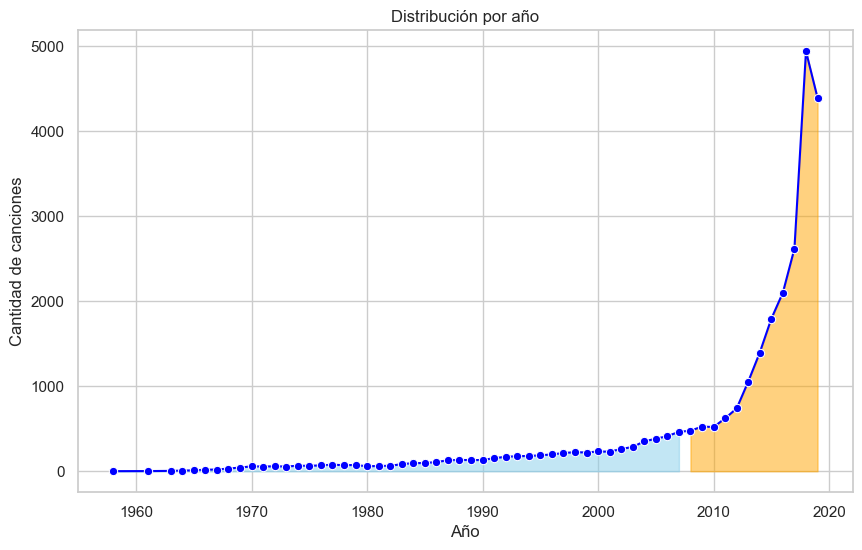

In [22]:
# Estudiamos la distribución de canciones por año
df['year'] = pd.to_datetime(df['track_album_release_date'], errors='coerce').dt.year

yearly_tracks = df['year'].value_counts().sort_index()
yearly_tracks_smoothed = yearly_tracks.rolling(window=3, center=True).mean()

# Plotting the smoothed trend with annotations and color coding
plt.figure(figsize=(10, 6))
sns.lineplot(x=yearly_tracks_smoothed.index, y=yearly_tracks_smoothed.values, marker='o', color='blue')
plt.title('Distribución por año')
plt.xlabel('Año')
plt.ylabel('Cantidad de canciones')
plt.grid(True)

max_year = yearly_tracks.idxmax()
max_value = yearly_tracks.max()
plt.annotate(f'Maximum in {max_year}', xy=(max_year, max_value), xytext=(max_year-10, max_value + 500),
             arrowprops=dict(facecolor='black', arrowstyle="->"))

plt.fill_between(yearly_tracks_smoothed.index, yearly_tracks_smoothed.values, where=yearly_tracks_smoothed.index < 2008, color='skyblue', alpha=0.5)
plt.fill_between(yearly_tracks_smoothed.index, yearly_tracks_smoothed.values, where=yearly_tracks_smoothed.index >= 2008, color='orange', alpha=0.5)

plt.show()

Queda claro que a partir de 2010 la cantidad de canciones publicadas por año (en Spotify) aumenta notablemente.

Es importante destacar que la aplicación se encuentra disponible desde 2008.

Las canciones publicadas antes de este año podría estar sufriendo un sesgo de supervivencia (sólo se agregan las canciones que han perdurado).

In [23]:
df.sample(15)

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,year
23269,0dbTQYW3Ad1FTzIA9t90E8,Mona Lisa (feat. Kendrick Lamar),Lil Wayne,71,50yFYgKdwJANZ5O9MIbMkg,Tha Carter V,2018-09-28,Hip pop,1Sc7bobknESH7SXQcnmoX5,r&b,...,-4.393,1,0.1690,0.371000,0.000000,0.1090,0.4900,122.078,324189,2018.0
20513,79zvVrn65ksbiGQxrtV4I5,Guaya Guaya,Don Omar,67,57mWSm5UtRGT08KeJuyZqu,The Last Don II,2015-06-16,Latin/Hip Hop/Dancehall/Soca,2rg9LCyvaMQvnCE2hVndpR,latin,...,-2.322,1,0.1170,0.006070,0.000520,0.0908,0.7030,91.981,193613,2015.0
4995,3vwmTGh2zgxxoJzvcvJfhm,Feels Like Home - Radio Edit,The Him,1,0C8XZS60DqcTTWAjtYEpjY,Feels Like Home (Radio Edit),2015-11-30,Indie Poptimism!,4hKPJNFIhdAg4pAksn78FJ,pop,...,-3.754,1,0.1530,0.023200,0.000372,0.0948,0.4570,121.978,184918,2015.0
4700,6oJ6le65B3SEqPwMRNXWjY,Higher Love,Kygo,87,4wquJImu8RtyEuDtIAsfcE,Higher Love,2019-06-28,indie poptimism🕺🏻,6MQeEHHDs6HQkN5Dlj3oKo,pop,...,-7.159,1,0.0324,0.015400,0.000006,0.1010,0.4040,103.952,228267,2019.0
18233,2vNDq5XAoF4Gl4hfY7aacS,¿Qué Tiene?,Ximena Sariñana,54,3TF5YZurXL6aE9cbkWEbUu,¿Qué Tiene?,2018-08-10,Latin Pop Songs,5uOMV7g6vp8WxoqXfkzKaw,latin,...,-7.623,0,0.1590,0.629000,0.004620,0.0940,0.7040,87.907,177273,2018.0
3162,2upFJKo7EvWdMx5732mhuc,5 8 6 - Live,New Order,19,3mZDjow2ZIxfWewSXum1d8,NOMC15 (Live),2017-12-01,Electropop And Play,7p30DzTAgW6OhspSXHTI88,pop,...,-12.088,0,0.0340,0.001190,0.351000,0.9880,0.5400,130.518,321773,2017.0
11399,0ZNFoXjeI3yDbXI4THHbzl,First Finale,オメガトライブ,17,0rKp7KsPDhyl7saBEKGxE4,First Finale,1985-12-11,City Pop 1985 シティーポップ,3j2osvmecEao5nmo9jZ5df,rock,...,-6.220,1,0.0317,0.536000,0.000005,0.0744,0.3020,73.845,288667,1985.0
25461,7xVgFMUpn9BsyviaKJt0qq,Lovely,Tane,24,0PIBtxUQZdZzLDoQokX1vb,Lovely,2018-04-10,NEO SOUL GUITAR,0r5ojPhjqGVq21oQR13UJy,r&b,...,-14.096,1,0.0485,0.877000,0.857000,0.1440,0.0768,82.977,160482,2018.0
24372,21RBQHOqgMuyyFvjbbXqfe,Come Baby Come,K7,4,2M3xdIQICPLsdoHE5UTnSX,Swing Batta Swing! (US Release),2004-11-30,"Swingbeat (old skool), New Jack Swing, R&B, Hi...",3krpccUV68nBGAQbvHEZDC,r&b,...,-7.739,0,0.1910,0.028300,0.000000,0.0468,0.5480,106.118,239733,2004.0
16298,1oLxfF4dmgoKunk9LCQBCX,Fade Away,Sam Feldt,3,3DXfe2cEsCdAjORfXw0NDK,Sunrise To Sunset,2017-11-24,Tropical House,37i9dQZF1DX0AMssoUKCz7,latin,...,-3.246,0,0.0329,0.031400,0.000000,0.3370,0.3880,105.060,170857,2017.0


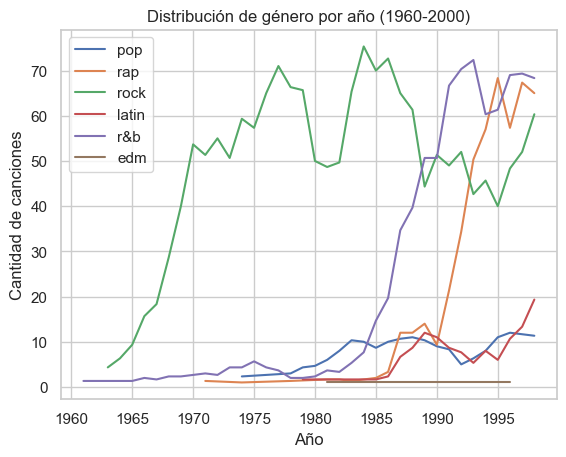

In [24]:
#Distribución de género por año
genres = df['playlist_genre'].unique()
df_yr = df[df['year'] < 2000]

for i in genres:
    sample = df_yr[df_yr['playlist_genre'] == i]
    yearly_tracks = sample['year'].value_counts().sort_index()
    yearly_tracks_smoothed = yearly_tracks.rolling(window=3, center=True).mean()
    yearly_tracks_smoothed = yearly_tracks_smoothed.dropna()
    plt.plot(yearly_tracks_smoothed.index, yearly_tracks_smoothed.values, label=i)

# Añadir etiquetas y título
plt.xlabel('Año')
plt.ylabel('Cantidad de canciones')
plt.title('Distribución de género por año (1960-2000)')
#plt.yscale('log')
plt.legend()
plt.show()


Puede verse la evolución de los distintos géneros a través de los años.

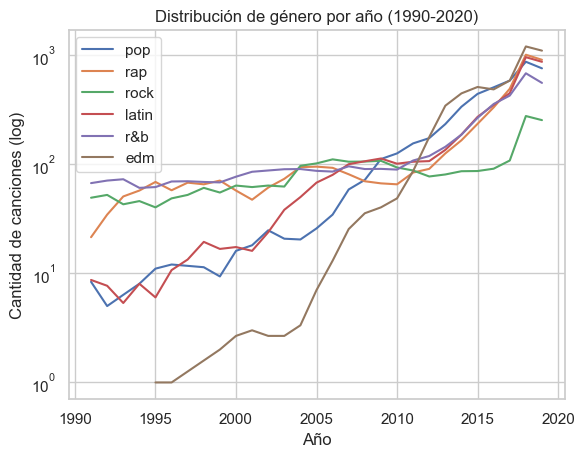

In [25]:
#Distribución de género por año
df_yr = df[df['year'] >= 1990]

for i in genres:
    sample = df_yr[df_yr['playlist_genre'] == i]
    yearly_tracks = sample['year'].value_counts().sort_index()
    yearly_tracks_smoothed = yearly_tracks.rolling(window=3, center=True).mean()
    yearly_tracks_smoothed = yearly_tracks_smoothed.dropna()
    plt.plot(yearly_tracks_smoothed.index, yearly_tracks_smoothed.values, label=i)

# Añadir etiquetas y título
plt.xlabel('Año')
plt.ylabel('Cantidad de canciones (log)')
plt.title('Distribución de género por año (1990-2020)')
plt.yscale('log')
plt.legend()
plt.show()

Es destacable el surgimiento del género 'edm' a partir 1995 y el declino del 'rock' a partir de 2010.

En 2017 se produce un incremento similar de la cantidad de canciones en todos los géneros.

## Limpieza del Dataset

### Identificación de valores nulos

In [26]:
# Vemos la cantidad de valores nulos por cada campo
df.isnull().sum()

track_id                       0
track_name                     5
track_artist                   5
track_popularity               0
track_album_id                 0
track_album_name               5
track_album_release_date       0
playlist_name                  0
playlist_id                    0
playlist_genre                 0
playlist_subgenre              0
danceability                   0
energy                         0
key                            0
loudness                       0
mode                           0
speechiness                    0
acousticness                   0
instrumentalness               0
liveness                       0
valence                        0
tempo                          0
duration_ms                    0
year                        1886
dtype: int64

Se identifican 5 pistas que no tienen información de 'track_name' y 'track_artist', posiblemente se trata de las mismas canciones.

In [27]:
# filtramos para ver los registros con valores nulos
null_data = df[df.isnull().any(axis=1)]
null_data

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,year
151,2QtJA4gbwe1AcanB2p21aP,Stay The Night - Featuring Hayley Williams Of ...,Zedd,61,4xak0izXQHOMV9Wu1mDAAy,Clarity (Deluxe),2012,Dance Pop,37i9dQZF1DWZQaaqNMbbXa,pop,...,-3.109,1,0.0411,0.10900,0.000000,0.0947,0.461,127.961,217347,NaN
749,77j9HOrxUpWcjwra9jgvio,We like to Party! (Six Flags),Vengaboys,51,0R44mmTKUE1XCuGVVrPfTZ,We like to Party! (The Vengabus),1998,90s Dance Hits,50cXvxgMGrvoUeLhkzCyIO,pop,...,-7.929,1,0.0449,0.00803,0.859000,0.0460,0.969,136.018,224227,NaN
750,6rQ9qJPvInEqSzlh89LsPJ,Coco Jamboo - Radio Version,Mr. President,18,2t8Bc4qBseswbwOoHGHK8d,We See The Same Sun,1996,90s Dance Hits,50cXvxgMGrvoUeLhkzCyIO,pop,...,-5.414,0,0.0421,0.07910,0.000000,0.1520,0.965,100.019,218733,NaN
751,5FgtdSf7I5lClThz2ptWvl,Blue (Da Ba Dee),Eiffel 65,16,65DySolRDG1LNSvRXcWQWN,Europop,1999,90s Dance Hits,50cXvxgMGrvoUeLhkzCyIO,pop,...,-11.471,0,0.0582,0.25900,0.000162,0.3900,0.765,128.007,283748,NaN
753,2ahnofp2LbBWDXcJbMaSTu,What Is Love,Haddaway,70,0qTVjeVP70YvQG4GctetOf,What is Love - Remix,1993,90s Dance Hits,50cXvxgMGrvoUeLhkzCyIO,pop,...,-7.907,0,0.0311,0.02220,0.014900,0.2030,0.737,123.871,270373,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32360,0363w3IUcO4cJMsAFLpfLY,Faith - Radio Edit,Blasterjaxx,0,1IZUFYTXNbjkzgawT7cFpM,Faith,2013,Gym (Melbourne Bounce/Progressive House),5BqOZpVEqRDfZScvW1QUyA,edm,...,-6.566,0,0.0486,0.00636,0.002310,0.1870,0.670,128.009,183067,NaN
32767,1h7LBCgfnSUEe7qXRbwMIp,Push Play,Zedd,39,4xak0izXQHOMV9Wu1mDAAy,Clarity (Deluxe),2012,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,-1.440,1,0.0459,0.08680,0.000000,0.0841,0.252,130.030,219360,NaN
32774,1NtVWYw9QDr30Ei0phACni,Lessons In Love (feat. Neon Trees),Kaskade,23,7r47EiktL01BmvI7NHdgcA,Fire & Ice,2011,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,-4.335,1,0.0540,0.02650,0.000013,0.1330,0.597,127.989,247693,NaN
32775,454ZIylnCq09ONjQE4EJ6a,Turn It Down (with Rebecca & Fiona) - Radio Edit,Kaskade,13,0xiigD6kCGMSv9CcSpJFUr,"I Love You, Man (Bonus Track Version)",2011,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,-7.922,0,0.0455,0.05360,0.008350,0.3390,0.413,126.971,238360,NaN


Se observó que los features musicales tenían valores normales en relación al resto del dataset. Por ese motivo se decidió conservar estas canciones.

### Tratamiento de duplicados

Verificamos si había canciones ingresadas más de una vez al dataset (mismo track_id) y eliminamos los duplicados.

In [28]:
# Búsqueda de duplicados
duplicate_counts = df['track_id'].value_counts()[df['track_id'].value_counts() > 1]
print(duplicate_counts)

track_id
7BKLCZ1jbUBVqRi2FVlTVw    10
14sOS5L36385FJ3OL8hew4     9
3eekarcy7kvN4yt5ZFzltW     9
2Fxmhks0bxGSBdJ92vM42m     8
2tnVG71enUj33Ic2nFN6kZ     8
                          ..
3KYiA4vq6RPO1dE2XROXd8     2
2sZtaJ4RFbRAAOBKWEeR4H     2
2JiVVU7qv1YeD1yabpIyoX     2
1WkMMavIMc4JZ8cfMmxHkI     2
6hmhG1b4LEyNuashVvuIAo     2
Name: count, Length: 3166, dtype: int64


In [29]:
df.loc[df['track_id'] == '7BKLCZ1jbUBVqRi2FVlTVw']

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,year
133,7BKLCZ1jbUBVqRi2FVlTVw,Closer (feat. Halsey),The Chainsmokers,85,0rSLgV8p5FzfnqlEk4GzxE,Closer (feat. Halsey),2016-07-29,Dance Pop,37i9dQZF1DWZQaaqNMbbXa,pop,...,-5.599,1,0.0338,0.414,0.0,0.111,0.661,95.01,244960,2016.0
1731,7BKLCZ1jbUBVqRi2FVlTVw,Closer (feat. Halsey),The Chainsmokers,85,0rSLgV8p5FzfnqlEk4GzxE,Closer (feat. Halsey),2016-07-29,Post pop teen,222nc9tKxKhfZ2GBrOpwH3,pop,...,-5.599,1,0.0338,0.414,0.0,0.111,0.661,95.01,244960,2016.0
2478,7BKLCZ1jbUBVqRi2FVlTVw,Closer (feat. Halsey),The Chainsmokers,85,0rSLgV8p5FzfnqlEk4GzxE,Closer (feat. Halsey),2016-07-29,Electropop Hits 2017-2020,7kyvBmlc1uSqsTL0EuNLrx,pop,...,-5.599,1,0.0338,0.414,0.0,0.111,0.661,95.01,244960,2016.0
4535,7BKLCZ1jbUBVqRi2FVlTVw,Closer (feat. Halsey),The Chainsmokers,85,0rSLgV8p5FzfnqlEk4GzxE,Closer (feat. Halsey),2016-07-29,A Loose Definition of Indie Poptimism,4ZO0wp9G8FA3X6oYNBzda6,pop,...,-5.599,1,0.0338,0.414,0.0,0.111,0.661,95.01,244960,2016.0
7369,7BKLCZ1jbUBVqRi2FVlTVw,Closer (feat. Halsey),The Chainsmokers,85,0rSLgV8p5FzfnqlEk4GzxE,Closer (feat. Halsey),2016-07-29,◤ Hip Hop Dance Music – Urban – Trap – Breakin...,0Hr2h94pKN8QAGVAgD6BsD,rap,...,-5.599,1,0.0338,0.414,0.0,0.111,0.661,95.01,244960,2016.0
17467,7BKLCZ1jbUBVqRi2FVlTVw,Closer (feat. Halsey),The Chainsmokers,85,0rSLgV8p5FzfnqlEk4GzxE,Closer (feat. Halsey),2016-07-29,Tropical House Run 190 BPM,37i9dQZF1DWSTc9FdySHtz,latin,...,-5.599,1,0.0338,0.414,0.0,0.111,0.661,95.01,244960,2016.0
18358,7BKLCZ1jbUBVqRi2FVlTVw,Closer (feat. Halsey),The Chainsmokers,85,0rSLgV8p5FzfnqlEk4GzxE,Closer (feat. Halsey),2016-07-29,2020 Hits & 2019 Hits – Top Global Tracks 🔥🔥🔥,4JkkvMpVl4lSioqQjeAL0q,latin,...,-5.599,1,0.0338,0.414,0.0,0.111,0.661,95.01,244960,2016.0
19770,7BKLCZ1jbUBVqRi2FVlTVw,Closer (feat. Halsey),The Chainsmokers,85,0rSLgV8p5FzfnqlEk4GzxE,Closer (feat. Halsey),2016-07-29,2020 Hits & 2019 Hits – Top Global Tracks 🔥🔥🔥,4JkkvMpVl4lSioqQjeAL0q,latin,...,-5.599,1,0.0338,0.414,0.0,0.111,0.661,95.01,244960,2016.0
23784,7BKLCZ1jbUBVqRi2FVlTVw,Closer (feat. Halsey),The Chainsmokers,85,0rSLgV8p5FzfnqlEk4GzxE,Closer (feat. Halsey),2016-07-29,2020 Hits & 2019 Hits – Top Global Tracks 🔥🔥🔥,4JkkvMpVl4lSioqQjeAL0q,r&b,...,-5.599,1,0.0338,0.414,0.0,0.111,0.661,95.01,244960,2016.0
30629,7BKLCZ1jbUBVqRi2FVlTVw,Closer (feat. Halsey),The Chainsmokers,85,0rSLgV8p5FzfnqlEk4GzxE,Closer (feat. Halsey),2016-07-29,2015 songs,6UJw1egIcZVfrBmcKs5uHH,edm,...,-5.599,1,0.0338,0.414,0.0,0.111,0.661,95.01,244960,2016.0


Pudimos ver que las entradas duplicadas están en diferentes playlists, pero se trata siempre de la misma canción, con los mismos features musicales.

El único valor conflictivo es 'playlist_genre' ya que no necesariemente es descriptivo del género real de la canción. Decidimos conservar sólo la primer entrada a modo descriptivo.

In [30]:
# Eliminación de duplicados
df = df.drop_duplicates(subset='track_id', keep='first')

In [31]:
# Verificación
duplicate_counts = df['track_id'].value_counts()[df['track_id'].value_counts() > 1]
print(duplicate_counts)

Series([], Name: count, dtype: int64)


### Tratamiento de outliers

#### Variable track_popularity

Identificamos que la presencia de gran cantidad de canciones con valor 0 de 'track_popularity'. Luego de explorar el dataset pensamos que puede deberse a que esas canciones no han recibido suficientes escuchas para establecer su popularidad, lo cual puede deberse a factores externos (ej. falta de promoción, artista desconocido) que exceden la información del presente dataset, en particular a las variables musicales con las que se intenta verificar si existe una correlación.

In [32]:
# Verificamos la cantidad de canciones con track_popularity igual a 0
unpopular_counts = df['track_popularity'] == 0
print(unpopular_counts)
unpopular_counts.sum()

0        False
1        False
2        False
3        False
4        False
         ...  
32828    False
32829    False
32830    False
32831    False
32832    False
Name: track_popularity, Length: 28356, dtype: bool


2620

Con base en el histograma anterior de distribución de 'track_popularity' se determinó realizar un corte de los valores menores a 10, por ser el límite de separación de ambos picos.

In [33]:
# Eliminamos las canciones con track_popularity mayores a 10
df = df[df['track_popularity'] > 10]


In [34]:
# Verificamos la eliminación de canciones con track_popularity igual a 0
unpopular_counts = df['track_popularity'] < 10
print(unpopular_counts)
unpopular_counts.sum()

0        False
1        False
2        False
3        False
4        False
         ...  
32828    False
32829    False
32830    False
32831    False
32832    False
Name: track_popularity, Length: 23196, dtype: bool


0

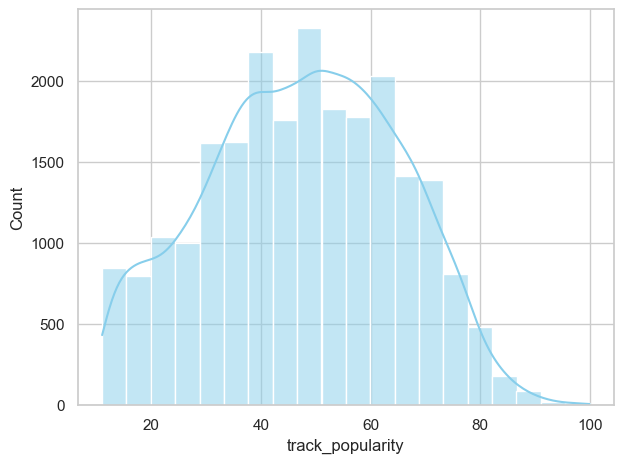

In [35]:
# Verificamos la distribución del campo track_popularity
sns.histplot(data=df, x='track_popularity', bins=20, kde=True, color="skyblue")
plt.tight_layout()  # Ajustar layout para evitar solapamientos
plt.show()

#### Variable tempo

In [36]:
# Detección de outliers por método del desvío estándar.
data = df['tempo']
data_mean, data_std = np.mean(data), np.std(data)
cutoff = data_std*3
lower,upper = data_mean-cutoff, data_mean+cutoff
outliers_idx = np.argwhere((data<lower) | (data>upper))

# Eliminamos las canciones con tempo fuera de los límites establecidos
df = df[(df['tempo'] > lower) & (df['tempo'] < upper)]

print(f"Limite de corte inferior {round(lower,2)} bpm.")
print(f"Limite de corte superior {round(upper,2)} bpm.")
print(f"Se eliminan {len(outliers_idx)} entradas que exceden los límites de tempo.")

Limite de corte inferior 39.69 bpm.
Limite de corte superior 202.22 bpm.
Se eliminan 72 entradas que exceden los límites de tempo.


#### Variable duracion_ms

In [37]:
# Detección de outliers con método del rango intercuartílico (IQR)
# Análisis por cuartiles
data = df['duration_ms']
q25, q75 = np.percentile(data, 25), np.percentile(data, 75)
iqr = q75 - q25
cutoff = iqr * 1.5
lower,upper = q25-cutoff, q75+cutoff
outliers_idx = np.argwhere((data<lower) | (data>upper))

# Análisis por percentiles
q15, q85 = np.percentile(data, 15), np.percentile(data, 85)
iqr_per = q85 - q15
cutoff_per = iqr * 1.5
lower_per,upper_per = q15-cutoff_per, q85+cutoff_per
outliers_idx_per = np.argwhere((data<lower_per) | (data>upper_per))

In [38]:
print('Análisis por cuartiles:')
print('Límite inferior ',lower)
print('Límite superior ',upper)

Análisis por cuartiles:
Límite inferior  88289.75
Límite superior  347783.75


In [39]:
print('Análisis por percentiles:')
print('Límite inferior ',lower_per)
print('Límite superior ',upper_per)

Análisis por percentiles:
Límite inferior  73305.0
Límite superior  372711.8


Decidimos realizar el corte únicamente por el percentil inferior. Es decir, pistas con una duración menor a 1,2 min.

In [40]:
# Eliminamos las canciones con duración fuera de los límites establecidos
df = df[df['duration_ms'] > lower_per]
outliers_idx_per = np.argwhere(data<lower_per)
print(f"Limite de corte inferior {round(lower_per,2)} ms.")
print(f"Se eliminan {len(outliers_idx_per)} entradas por debajo del límite de duración.")

Limite de corte inferior 73305.0 ms.
Se eliminan 39 entradas por debajo del límite de duración.


#### Variable loudness

Identificamos que algunos outliers en la variable loudness, que presentaban pistas con un "volumen" extremadamente bajo.

In [41]:
# Verificamos la cantidad de canciones con loudness menor a -30 dB
low_loudness_counts = df['loudness'] < -30
print(low_loudness_counts)
print(f"Se identifica un total de {low_loudness_counts.sum()} pistas.")

0        False
1        False
2        False
3        False
4        False
         ...  
32828    False
32829    False
32830    False
32831    False
32832    False
Name: loudness, Length: 23085, dtype: bool
Se identifica un total de 4 pistas.


In [42]:
df[df['loudness'] < -30]

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,year
17008,34v7cD6VR3fVYguedQ1wuh,Tropical Forest,The Sleep Specialist,54,3TRoUn8OKRVUcbprXmyGgj,Jungle And Forest Sounds,2017-01-09,Tropical Nights,37i9dQZF1DX0ES2mnOVvai,latin,...,-36.509,0,0.0366,0.1290,0.979,0.2470,0.0388,84.122,117449,2017.0
17010,28ilcqErfNjitJ7T3byHoX,Peaceful Forest,The Sleep Specialist,51,3TRoUn8OKRVUcbprXmyGgj,Jungle And Forest Sounds,2017-01-09,Tropical Nights,37i9dQZF1DX0ES2mnOVvai,latin,...,-46.448,0,0.0542,0.8800,0.613,0.1840,0.0122,116.884,181204,2017.0
17016,61SiFnjiY36uVSTBVXK5Yw,The Sound Of The Jungle With Coloured Birds Fo...,Life Sounds Nature,44,5qukUq6sBLjghcEcFOdgKP,"The Very Best Sound Of Nature - Birds, Waves, ...",2015-04-01,Tropical Nights,37i9dQZF1DX0ES2mnOVvai,latin,...,-36.624,0,0.0562,0.0509,0.136,0.0791,0.0234,77.998,93010,2015.0
17018,5iAB4tlYseBES4MKqgY4KG,Relaxing Crickets And Waterfall,Natural Sound Makers,52,2GLxsxoWpW8MOw9O9AAsf9,Forest By Night,2017-01-09,Tropical Nights,37i9dQZF1DX0ES2mnOVvai,latin,...,-35.960,1,0.0580,0.1180,0.972,0.0793,0.0116,169.062,264154,2017.0


Decidimos eliminarlos por no tratarse de pistas musicales, son grabaciones de sonidos de la naturaleza.

In [43]:
# Eliminamos las canciones con loudness menor a -30 dB
df = df[df['loudness'] > -30]

In [44]:
# Verificamos la eliminacion de las canciones con loudness menor a -30 dB
low_loudness_counts = df['loudness'] < -30
print(low_loudness_counts)
low_loudness_counts.sum()

0        False
1        False
2        False
3        False
4        False
         ...  
32828    False
32829    False
32830    False
32831    False
32832    False
Name: loudness, Length: 23081, dtype: bool


0

In [45]:
#ELIMINAR!!
df_bu = df.copy()

In [46]:
#ELIMINAR!!
df = df_bu.copy()

## Transformación de Variables y Selección de Features

### Eliminación de features string

Eliminamos los features string que describen la pista, el album o la playlist. Únicamente conservamos 'track_id' para referencia y 'playlist_genre' que será usada más adelante.

In [47]:
df.drop(columns=['track_name', 'track_artist', 'track_album_id', 'track_album_name',  'playlist_subgenre', 'track_album_release_date', 'playlist_name', 'playlist_id'], inplace=True)

### Transformación de fetures musicales continuos en categóricos

In [48]:
df_cat = df.copy()

In [49]:
#LIMITES
# danceability: > 0.5 -> bailable
# speechiness: > 0.66 -> speech
# acousticness: > 0.5 -> acoustic 
# intstrumentalness: > 0.5 -> intstrumental 
# liveness: > 0.8 -> live 
# valence: 1 = positiva / 0 = negativa

df_cat.loc[:, 'danceability'] = df_cat['danceability'] > 0.5
df_cat.loc[:, 'speechiness'] = df_cat['speechiness'] > 0.66
df_cat.loc[:, 'acousticness'] = df_cat['acousticness'] > 0.5
df_cat.loc[:, 'instrumentalness'] = df_cat['instrumentalness'] > 0.5
df_cat.loc[:, 'liveness'] = df_cat['liveness'] > 0.8
df_cat.loc[:, 'valence'] = df_cat['valence'] > 0.5

C:\Users\Martin\AppData\Local\Temp\ipykernel_18976\845413608.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ True  True  True ...  True  True  True]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_cat.loc[:, 'danceability'] = df_cat['danceability'] > 0.5
C:\Users\Martin\AppData\Local\Temp\ipykernel_18976\845413608.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[False False False ... False False False]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_cat.loc[:, 'speechiness'] = df_cat['speechiness'] > 0.66
C:\Users\Martin\AppData\Local\Temp\ipykernel_18976\845413608.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[False False False ... False False False]' has dtype i

In [50]:
df_cat.describe()

,track_popularity,energy,key,loudness,mode,tempo,duration_ms,year
count,23081.000000,23081.000000,23081.000000,23081.000000,23081.000000,23081.000000,23081.000000,21810.000000
mean,47.624410,0.692901,5.353104,-6.806251,0.566613,120.734644,222975.296824,2012.517148
std,17.580487,0.183074,3.617693,2.986322,0.495554,26.690995,58376.217833,10.436210
min,11.000000,0.011800,0.000000,-29.561000,0.000000,48.718000,73777.000000,1957.000000
25%,35.000000,0.573000,2.000000,-8.267000,0.000000,99.962000,185742.000000,2011.000000
50%,48.000000,0.716000,6.000000,-6.260000,1.000000,121.915000,213989.000000,2017.000000
75%,61.000000,0.836000,9.000000,-4.722000,1.000000,134.364000,250583.000000,2019.000000
max,100.000000,1.000000,11.000000,1.275000,1.000000,202.134000,517810.000000,2020.000000


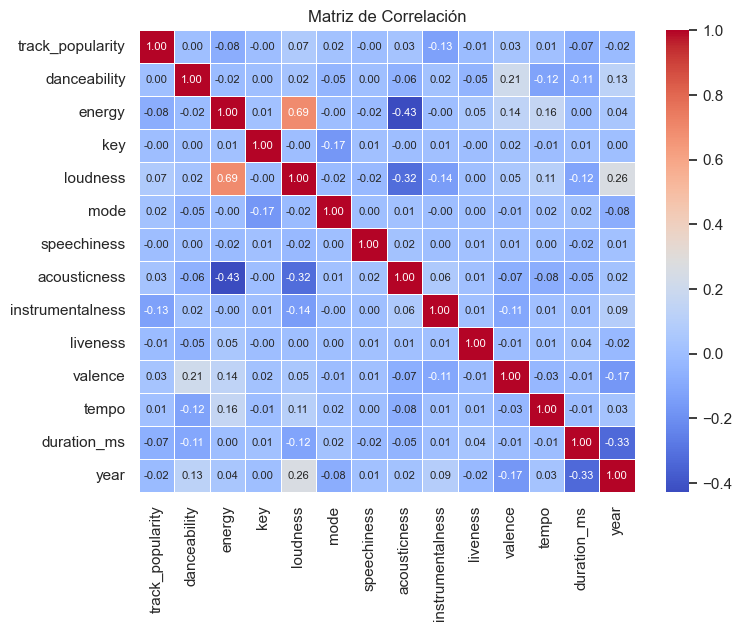

In [51]:
# Seleccionar solo columnas numéricas
numeric_df = df_cat.select_dtypes(include=['number', 'bool'])

# Calcular la matriz de correlación
correlation_matrix = numeric_df.corr()

# Crear un gráfico de calor (heatmap) de la matriz de correlación
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={"size": 8}, linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

Puede verse que esta transformación empeora en todos los casos la correlación, por lo que será desestimada.

### Escalado de features numéricas

Realizamos un escalado 'MinMaxScaler' para trabajar con valores de rango [0, 1] en todas las features.

In [52]:
# Escalado de variables
df_scaled = df.copy()
scaler = MinMaxScaler()
df_scaled[['track_popularity','loudness','tempo','duration_ms','year']] = scaler.fit_transform(df[['track_popularity','loudness','tempo','duration_ms','year']])
df_scaled.describe()

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,year
count,23081.000000,23081.000000,23081.000000,23081.000000,23081.000000,23081.000000,23081.000000,23081.000000,23081.000000,23081.000000,23081.000000,23081.000000,23081.000000,21810.000000
mean,0.411510,0.656292,0.692901,5.353104,0.737928,0.566613,0.107680,0.183468,0.085304,0.188438,0.509312,0.469421,0.336007,0.881225
std,0.197534,0.145038,0.183074,3.617693,0.096845,0.495554,0.102151,0.225487,0.225892,0.152531,0.232680,0.173978,0.131468,0.165654
min,0.000000,0.077100,0.011800,0.000000,0.000000,0.000000,0.022400,0.000001,0.000000,0.009360,0.000010,0.000000,0.000000,0.000000
25%,0.269663,0.564000,0.573000,2.000000,0.690556,0.000000,0.040900,0.016100,0.000000,0.092700,0.329000,0.334020,0.252155,0.857143
50%,0.415730,0.673000,0.716000,6.000000,0.755643,1.000000,0.062400,0.085800,0.000016,0.126000,0.510000,0.477115,0.315769,0.952381
75%,0.561798,0.762000,0.836000,9.000000,0.805520,1.000000,0.133000,0.272000,0.004810,0.243000,0.691000,0.558260,0.398182,0.984127
max,1.000000,0.983000,1.000000,11.000000,1.000000,1.000000,0.918000,0.992000,0.994000,0.996000,0.991000,1.000000,1.000000,1.000000


### Corrección de skewness

Aplicamos un proceso de corrección del sesgo (skewness) analizando distintas transformaciones posibles para normalizar cada feature numérico intentando aproximarlo a una distribución gausiana. Se utiliza la transformación que mejor se adapta a los datos.

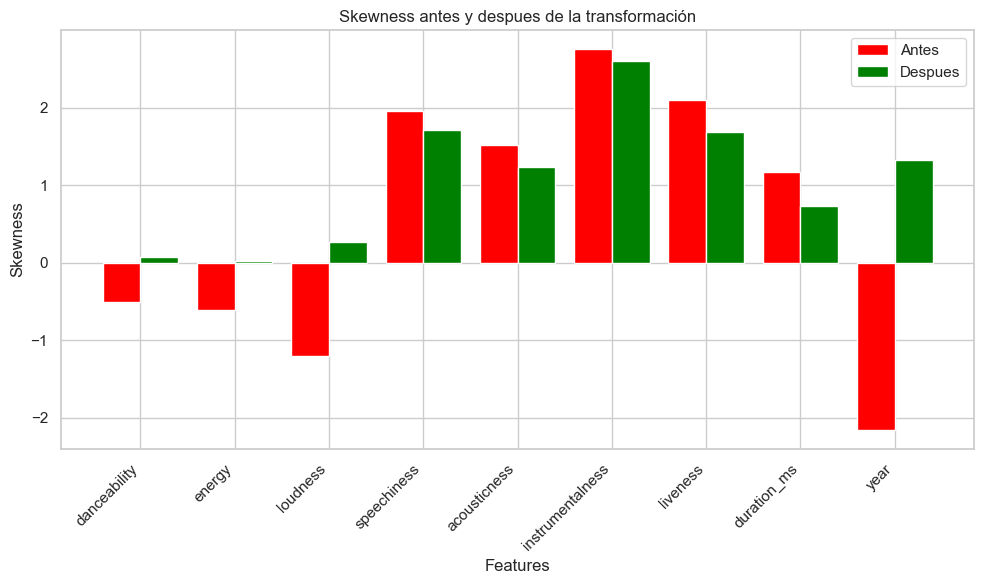

In [53]:
skew_df = pd.DataFrame(columns=['feature', 'before', 'after', 'transformer'])

def remove_skewness(feature, df_scaled):

    skew = df_scaled[feature].skew()
    output = df_scaled[feature]
    row = [feature, skew, 0, 'None'] 
    transformers = [np.log1p, np.sqrt] if skew > 0 else [np.square, np.exp, lambda x: x**3]
    
    for transformer in transformers:
        sample = transformer(df_scaled[feature] + 1) if transformer == np.sqrt else transformer(df_scaled[feature])
        if abs(sample.skew()) < abs(skew):
            skew = abs(sample.skew())
            output = sample
            row[2] = skew  
            row[3] = transformer._name_ if hasattr(transformer, '_name_') else str(transformer)

    skew_df.loc[len(skew_df)] = row
    return output

categorical_feat = []
numerical_feat = []

#Separamos nuestro dataset entre variables numericas y categoricas
for col in df_scaled.columns:
  if df_scaled[col].dtype == 'object':
    categorical_feat.append(col)
  else:
    numerical_feat.append(col)
  
skewed_features = [feat for feat in numerical_feat if abs(df_scaled[feat].skew()) >= 0.5]

#Aplicamos el skew solo a las variables numericas
for feat in skewed_features:
  df_scaled[feat] = remove_skewness(feat, df_scaled)

#Graficamos
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.4
index = range(len(skew_df))
bars_before = ax.bar(index, skew_df['before'], bar_width, label='Antes', color='red')
bars_after = ax.bar([i + bar_width for i in index], skew_df['after'], bar_width, label='Despues', color='green')
ax.set_xlabel('Features')
ax.set_ylabel('Skewness')
ax.set_title('Skewness antes y despues de la transformación')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(skew_df['feature'], rotation=45, ha='right')
ax.legend()
plt.tight_layout()
plt.show()

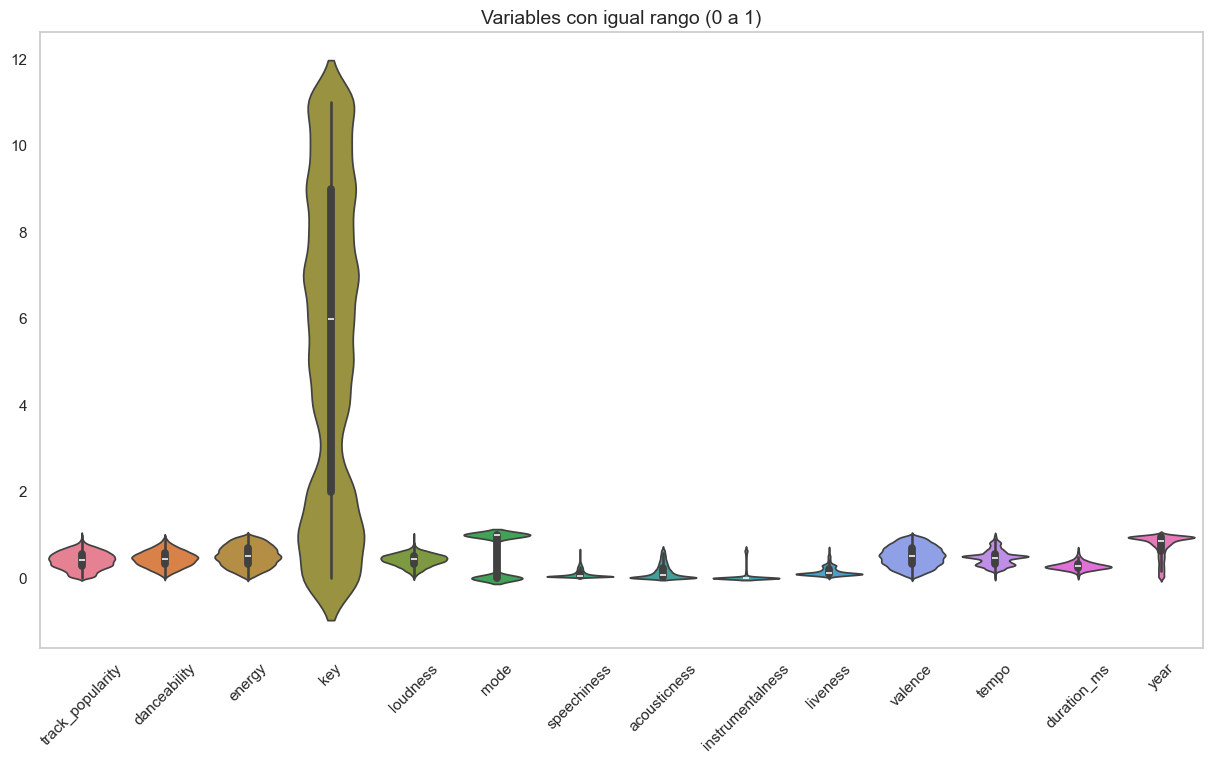

In [54]:
# Violin plot para variables con igual rango (0 a 1)
plt.figure(figsize=(15, 8))
plt.title('Variables con igual rango (0 a 1)', fontsize=14)
sns.violinplot(data=df_scaled)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

### Análisis de Tonalidad ('Key')

Aplicamos One Hot Encoding para crear variables dummies del feature 'key' (cada entero representa una tonalidad diferente). 

In [55]:
df_scaled['key'] = df_scaled['key'].astype(int)

# Realizar el one-hot encoding para la variable key
one_hot_encoded = pd.get_dummies(df_scaled['key'], prefix='key')

# Creamos un nuevo DataFrame one-hot encoded para key
df_key = pd.concat([df_scaled, one_hot_encoded], axis=1)

Observamos la correlación de cada tonalidad con 'track_popularity'

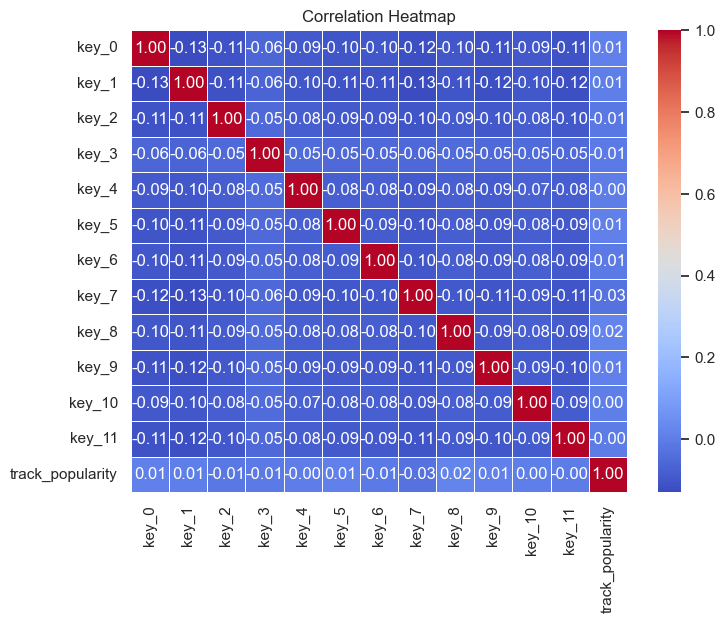

In [56]:
subset = []
subset = df_key[[col for col in df_key.columns if col.startswith('key_')] + ['track_popularity']]


corr_matrix = subset.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

Dado que la tonalidad (key) no presenta correlación con 'track_popularity' será desestimada.

In [57]:
df_scaled.drop(columns=['key'], inplace=True)

### One Hot Encoding para género

In [58]:
# Aplicar One Hot Encoding a la variable playlist_genre
df_scaled = pd.get_dummies(df_scaled, columns=['playlist_genre'], prefix='genre')
df_scaled.columns

Index(['track_id', 'track_popularity', 'danceability', 'energy', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'year', 'genre_edm', 'genre_latin',
       'genre_pop', 'genre_r&b', 'genre_rap', 'genre_rock'],
      dtype='object')

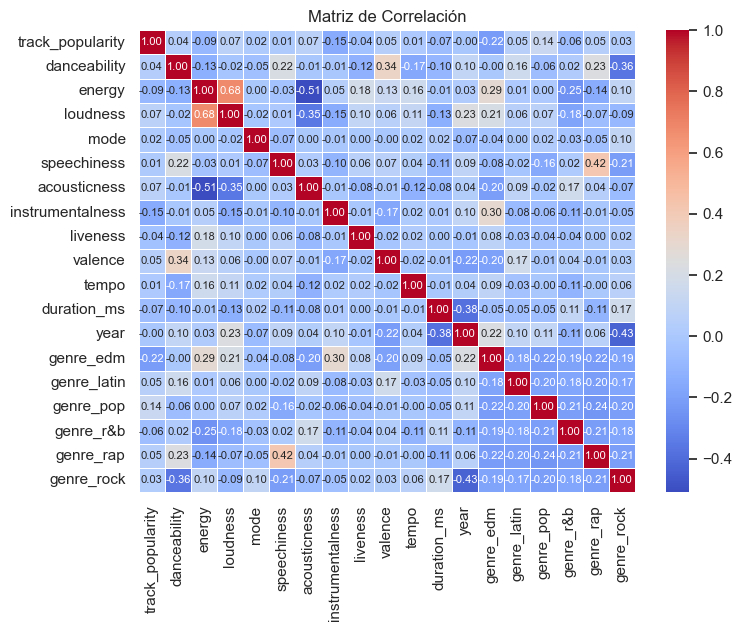

In [59]:
# Seleccionar solo columnas numéricas
numeric_df = df_scaled.select_dtypes(include=['number', 'bool'])

# Calcular la matriz de correlación
correlation_matrix = numeric_df.corr()

# Crear un gráfico de calor (heatmap) de la matriz de correlación
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={"size": 8}, linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

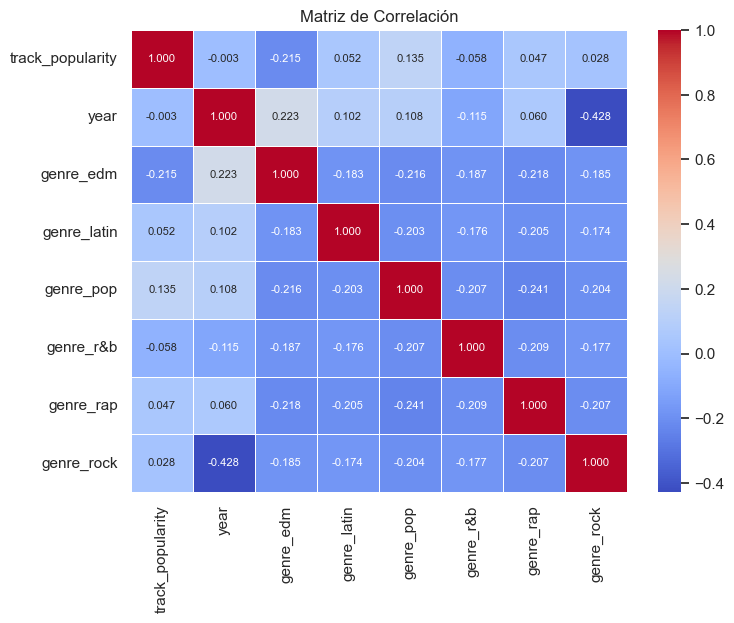

In [60]:
# Seleccionar solo columnas numéricas
numeric_df = df_scaled.select_dtypes(include=['number', 'bool'])
numeric_df.drop(columns=['danceability', 'energy', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms'], inplace=True)

# Calcular la matriz de correlación
correlation_matrix = numeric_df.corr()

# Crear un gráfico de calor (heatmap) de la matriz de correlación
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.3f', annot_kws={"size": 8}, linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

Se observa una correlación entre el año y el género, particularmente "rock" y "edm". Esto se debe a que la cantidad de pistas de "rock" ha disminuido con los años.

"Edm" aparece en el dataset a partir del 2000, siendo el género más reciente.

## Reducción de la Dimensionalidad

### PCA

En un primer lugar, comenzamos realizando un analisis de PCA para intentar reducir la cantidad de features de nuestro dataset sin perder una cantidad significativa de información. Para esto, utilizamos la función 'pca.explained_variance_ratio_' que nos permite encontrar que tanta varianza de 'track_popularity' es explicada por estas nuevas features

In [61]:
numerical_features = ['speechiness', 'acousticness', 'instrumentalness', 
                      'loudness', 'valence', 'tempo', 'duration_ms']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_scaled[numerical_features])

pca = PCA(n_components=3)  # Reducción a 3 componentes principales
pca_components = pca.fit_transform(X_scaled)

# Crear un DataFrame con los componentes principales
pca_df = pd.DataFrame(data=pca_components, columns=['PC1', 'PC2', 'PC3'])
pca_df['track_id'] = df_scaled['track_id']
pca_df['track_popularity'] = df_scaled['track_popularity']

In [62]:
explained_variance = pca.explained_variance_ratio_
print(f'Varianza explicada por el Componente Principal 1: {explained_variance[0]:.2%}')
print(f'Varianza explicada por el Componente Principal 2: {explained_variance[1]:.2%}')
print(f'Varianza explicada por el Componente Principal 3: {explained_variance[2]:.2%}')

Varianza explicada por el Componente Principal 1: 20.85%
Varianza explicada por el Componente Principal 2: 17.82%
Varianza explicada por el Componente Principal 3: 15.34%


In [63]:
loadings = pca.components_
loading_df = pd.DataFrame(loadings.T, index=numerical_features, columns=['PC1', 'PC2', 'PC3'])

print("Variables que más contribuyen a PC1:")
print(loading_df['PC1'].abs().sort_values(ascending=False))

print("\nVariables que más contribuyen a PC2:")
print(loading_df['PC2'].abs().sort_values(ascending=False))

print("\nVariables que más contribuyen a PC3:")
print(loading_df['PC3'].abs().sort_values(ascending=False))

Variables que más contribuyen a PC1:
loudness            0.658142
acousticness        0.554933
instrumentalness    0.300165
tempo               0.295151
valence             0.216797
speechiness         0.131893
duration_ms         0.131484
Name: PC1, dtype: float64

Variables que más contribuyen a PC2:
instrumentalness    0.492630
speechiness         0.471848
valence             0.462334
acousticness        0.394473
duration_ms         0.315718
tempo               0.237786
loudness            0.095358
Name: PC2, dtype: float64

Variables que más contribuyen a PC3:
duration_ms         0.682349
valence             0.411026
speechiness         0.360803
instrumentalness    0.340665
tempo               0.314837
acousticness        0.131857
loudness            0.052128
Name: PC3, dtype: float64


In [64]:
# mergeamos df_scaled y pca_df usando el track_id
pca_df.drop('track_popularity', axis=1, inplace=True)
df_scaled = pd.merge(df_scaled, pca_df, on='track_id', how='inner')

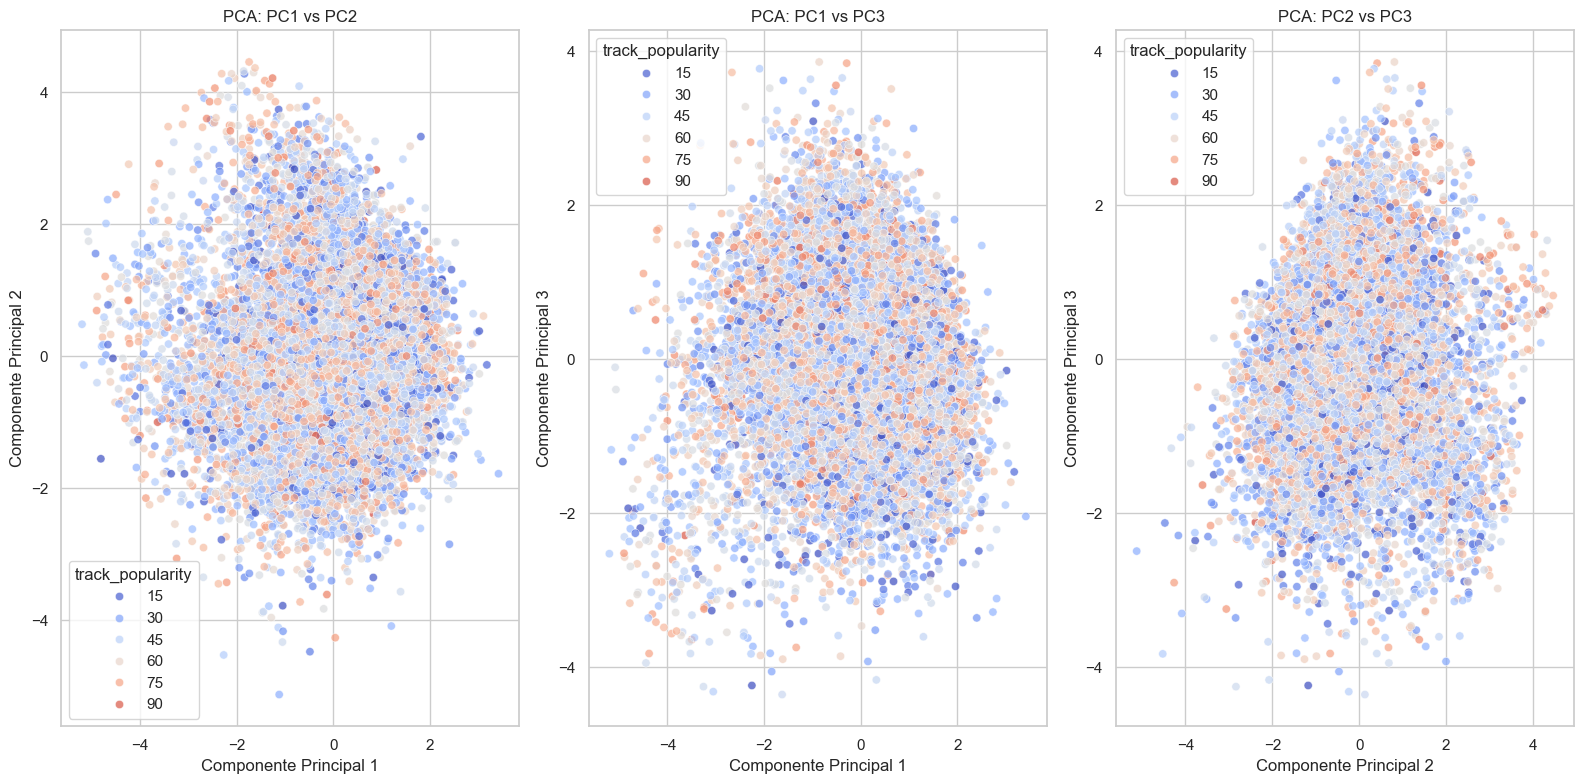

In [65]:
pca_df['track_popularity'] = df['track_popularity']

fig, axes = plt.subplots(1, 3, figsize=(16, 8))

# PC1 vs PC2
sns.scatterplot(x='PC1', y='PC2', hue='track_popularity', data=pca_df, palette='coolwarm', alpha=0.7, ax=axes[0])
axes[0].set_title('PCA: PC1 vs PC2')
axes[0].set_xlabel('Componente Principal 1')
axes[0].set_ylabel('Componente Principal 2')

# PC1 vs PC3
sns.scatterplot(x='PC1', y='PC3', hue='track_popularity', data=pca_df, palette='coolwarm', alpha=0.7, ax=axes[1])
axes[1].set_title('PCA: PC1 vs PC3')
axes[1].set_xlabel('Componente Principal 1')
axes[1].set_ylabel('Componente Principal 3')

# PC2 vs PC3
sns.scatterplot(x='PC2', y='PC3', hue='track_popularity', data=pca_df, palette='coolwarm', alpha=0.7, ax=axes[2])
axes[2].set_title('PCA: PC2 vs PC3')
axes[2].set_xlabel('Componente Principal 2')
axes[2].set_ylabel('Componente Principal 3')

# Ajustar el layout
plt.tight_layout()
plt.show()

De esta manera, decidimos que con solo 3 features podemos explicar mas del 50% de nuestra varianza total. Por esta razón, decidimos incluir a estos nuevos features al dataset. A partir de esto, probaremos cuales son los resultados con estos nuevos atributos.

In [66]:
%matplotlib widget
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Graficar los datos
ax.scatter(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'], c=pca_df['track_popularity'], cmap='coolwarm')

# Añadir etiquetas a los ejes
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

# Mostrar el gráfico
plt.show()

%matplotlib inline

RuntimeError: 'widget is not a recognised GUI loop or backend name

### t-SNE

Por otro lado, a diferencia de PCA, t-SNE permite realizar una seleccion de features mediante la construcción de una distribución de probabilidad sobre parejas de muestras en el espacio original, de forma tal que las muestras semejantes reciben alta probabilidad de ser escogidas, mientras que las muestras muy diferentes reciben baja probabilidad de ser escogidas.

In [96]:
tsne = TSNE(n_components=2, random_state=42, perplexity=30, max_iter=1000)
X_tsne = tsne.fit_transform(X_scaled)

tsne_df = pd.DataFrame(data=X_tsne, columns=['t-SNE1', 't-SNE2'])
tsne_df['track_popularity'] = df['track_popularity']

In [120]:
score = silhouette_score(X_tsne, df['track_popularity'])
print(f'Índice de Silhouette: {score}')

ValueError: Found input variables with inconsistent numbers of samples: [23081, 32833]

El valor obtenido puede variar entre -1 en el peor de los casos y +1 en el mejor de los casos. En nuestro caso, el valor de -0.4 significa que las observaciones no están bien agrupadas en el espacio de clústeres, y es probable que muchas muestras estén asignadas a clústeres incorrectos, lo cual sugiere una mala separación entre clústeres.

### Decision Tree

In [111]:
# seperación del df en features y target

X = df_scaled.drop(columns = 'track_popularity', axis=1)
y = df_scaled['track_popularity']

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [122]:
features = ['danceability', 'energy', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'year', 'genre_edm', 'genre_latin',
       'genre_pop', 'genre_r&b', 'genre_rap', 'genre_rock', 'PC1', 'PC2',
       'PC3']

In [125]:
dt = DecisionTreeRegressor(random_state=42, max_depth=3)
dt.fit(X_train[features], y_train)

DecisionTreeRegressor(max_depth=3, random_state=42)

In [126]:
y_pred = dt.predict(X_test[features])

# Evaluar el modelo
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'R2 Score: {r2:.2f}')

text_representation = tree.export_text(decision_tree=dt,
                                       feature_names=list(X_train[features]),
                                       spacing=5,
                                       decimals=3)
print(text_representation)

file_path = "decision_tree.txt"

with open(file_path, "w") as file:
    file.write(text_representation)

file_path

Mean Squared Error: 0.04
R2 Score: 0.02
|----- instrumentalness <= 0.000
|     |----- genre_pop <= 0.500
|     |     |----- year <= 0.886
|     |     |     |----- value: [0.429]
|     |     |----- year >  0.886
|     |     |     |----- value: [0.464]
|     |----- genre_pop >  0.500
|     |     |----- instrumentalness <= 0.000
|     |     |     |----- value: [0.522]
|     |     |----- instrumentalness >  0.000
|     |     |     |----- value: [0.469]
|----- instrumentalness >  0.000
|     |----- acousticness <= 0.008
|     |     |----- year <= 0.429
|     |     |     |----- value: [0.457]
|     |     |----- year >  0.429
|     |     |     |----- value: [0.355]
|     |----- acousticness >  0.008
|     |     |----- loudness <= 0.511
|     |     |     |----- value: [0.412]
|     |     |----- loudness >  0.511
|     |     |     |----- value: [0.466]



'decision_tree.txt'

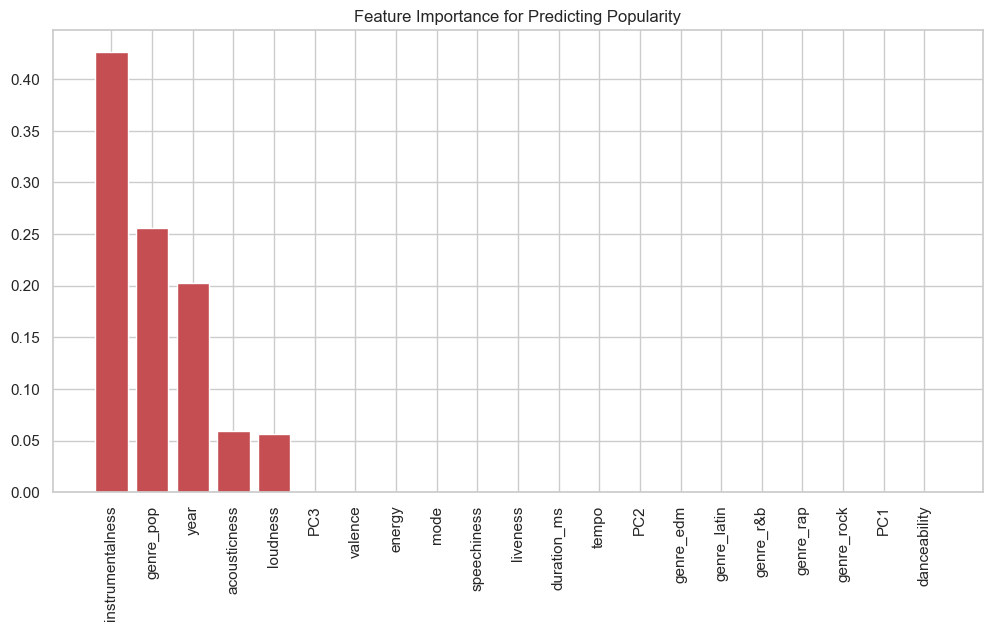

In [147]:
importances = dt.feature_importances_  # Use feature importance from a trained model
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 6))
plt.title("Feature Importance for Predicting Popularity")
plt.bar(range(X_train.shape[1]), importances[indices], color="r", align="center")
plt.xticks(range(X_train.shape[1]), [features[i] for i in indices], rotation=90)
plt.show()


Como se puede observar a partir del arbol obtenido con una maxima profundidad de 3 nodos, las features más importantes son 'instrumentalness', 'acousticness', 'year', 'genre_pop' y 'loudness'. Ademas, encontramos que el mean_squared_error para todos estos features es de 0.04. Por esta razón, intentaremos utilizar solamente las columnas obtenidas en el PCA para ver si los resultados mejoran.

In [94]:
features_pca = ['PC1', 'PC2','PC3']

dt_reduced = DecisionTreeRegressor(random_state=42, max_depth=5)
dt_reduced.fit(X_train[features_pca], y_train)

y_pred = dt_reduced.predict(X_test[features_pca])

# Evaluar el modelo
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'R2 Score: {r2:.2f}')


Mean Squared Error: 0.04
R2 Score: -0.01


Observamos entonces que con tan solo 3 features obtenemos resultados similares si bien siguen siendo malos. Posteriormente, aplicamos SelectKBest para comparar con los resultados obtenidos a traves de los arboles para ver que tan buena fue su selección de features.

In [117]:
X = X[features]

X = X.dropna()
y = y[X.index]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Aplicar SelectKBest para extraer las mejores k features basado en F-statistic
k = 5  
selector = SelectKBest(score_func=f_regression, k=k)


X_train_new = selector.fit_transform(X_train, y_train)
X_test_new = selector.transform(X_test)

# Seleccionar los features deseados
mask = selector.get_support()  
selected_features = [features[i] for i in range(len(features)) if mask[i]]
print("Selected features:", selected_features)

Selected features: ['danceability', 'loudness', 'instrumentalness', 'genre_pop', 'PC3']


In [119]:
features_SelectKBest = ['danceability', 'loudness', 'instrumentalness', 'genre_pop', 'PC3']

dt_reduced_2 = DecisionTreeRegressor(random_state=42, max_depth=5)
dt_reduced_2.fit(X_train[features_SelectKBest], y_train)

y_pred = dt_reduced_2.predict(X_test[features_SelectKBest])

# Evaluar el modelo
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'R2 Score: {r2:.2f}')

Mean Squared Error: 0.04
R2 Score: 0.01


A partir de esto, podemos visualizar que con tan solo 3 o 5 features mantenemos los mismos resultados pero podemos reducir la complejidad de nuestros modelos a entrenar posteriormente pasandoles una menor cantidad de datos.

## Conclusiones



En conclusión:
1. Pudimos realizar una limpieza del dataset mediante diversas técnicas que nos permitieron simplificar la estructura del mismo. De esta manera, la cantidad de datos considerados como outliers fue eliminada del dataset mediante distintas tecnicas de poda. 
2. En una segunda etapa se identificaron los valores nulos y duplicados para que fuesen eliminados del dataset.
3. Se realizo un escalado de los datos dado que los mismos se encontraban con varios ordenes de diferencia entre si. Por esta razón, la cantidad de filas del dataset, después de haber sido trabajado, es un 70% del dataset original.
4. Aplicamos un proceso de corrección del sesgo (skewness) analizando distintas transformaciones posibles para normalizar cada feature numérico intentando aproximarlo a una distribución gausiana. Se utiliza la transformación que mejor se adapta a los datos.
5. Mediante tecnicas como la categorizacion de variables continuas y one-hot encoding se realizó una transformacion profunda de los datos de Tonalidad ('Key'). Este campo fue eliminado posteriormente debido a que no presentaban correlación con 'track_popularity'.
6. Se redujo la cantidad de features desde 23 hasta entre 3 y 5, dependiendo del dataset que se utilice. Lo mismo se realizo mediante diversas tecnicas como la eliminacion de features de tipo 'String', SelectKBest, DecisionTreeRegressor, etc.

A partir de este trabajo realizado, será posible desarrollar modelos que predigan con mayor o menor certeza el feature deseado ('track_popularity').